# Описание проекта

Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!

# Цель проекта

Разработать модель машинного обучения, которая поможет фермеру управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:
* первая будет прогнозировать возможный удой коровы (целевой признак Удой);
* вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).    

С помощью модели нужно отобрать коров по двум критериям:
* средний удой за год — не менее 6000 килограммов;
* молоко должно быть вкусным.

# План работы

- загрузка и предобработка данных    
- в столбцах с бинарными значениями заменим значения на 1/0
- проведение статистического анализа всех признаков и построение графиков
- изучение взаимосвязи между признаками: расчет коэффициентов корреляции между всеми признаками
- построение диаграммы рассеяния для признака Удой, кг и всех количественных признаков с учётом значения категориальных признаков
- обучение трех моделей линейной регрессии (подготовка данных, обучение модели, оценка её качества)
- cравнение качества трёх моделей линейной регрессии, сопоставление их R² и остатков
- оценка качества каждой модели по трём метрикам: MSE, MAE, RMSE    
- с помощью лучшей модели спрогнозировать удой коров, которых фермер хочет купить    
- подготовка данных датасета ferma_main.csv и обучение на них модель LogisticRegression    
- проанализировать модель логистической регрессии    
- с помощью обученной модели спрогнозировать вкус молока коров, которых фермер хочет купить    
- итоговые выводы

# Описание данных

1. Файл ferma_main.csv содержит данные о стаде фермера на текущий момент.    
Описание данных:    
  id — уникальный идентификатор коровы.    
  Удой, кг — масса молока, которую корова даёт в год (в килограммах).    
  ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.    
  Сырой протеин, г — содержание сырого протеина в корме (в граммах).    
  СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.    
  Порода — порода коровы.    
  Тип пастбища — ландшафт лугов, на которых паслась корова.    
  порода папы_быка — порода папы коровы.    
  Жирность,% — содержание жиров в молоке (в процентах).    
  Белок,% — содержание белков в молоке (в процентах).    
  Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).    
  Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).    


Признаки в датасете ferma_main.csv можно разделить на группы.    
  Характеристики коровы: id, Порода, порода папы_быка, Возраст.    
  Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).    
  Характеристика пастбища: Тип пастбища.    
  Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.    
Такое разделение поможет вам понять, как взаимосвязаны признаки в датасете.        


2. Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера.    
Описание данных:    
  id — уникальный идентификатор коровы.    
  Имя Папы — имя папы коровы.        


3. Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой.    
Описание данных:    
  Порода — порода коровы.    
  Тип пастбища — ландшафт лугов, на которых паслась корова.    
  порода папы_быка — порода папы коровы.    
  Имя_папы — имя папы коровы.    
  Текущая_жирность,% — содержание жиров в молоке (в процентах).    
  Текущий_уровень_белок,% — содержание белков в молоке (в процентах).    
  Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).    

Данные в файлах ferma_main.csv и cow_buy.csv похожи, но у датасета cow_buy.csv несколько особенностей.
Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.
Кроме того, отсутствуют признаки Удой, кг и Вкус молока. Это целевые признаки, именно их предстоит предсказать!

# Шаг 1. Загрузка данных.

In [1]:
# Выгрузим все необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, accuracy_score, recall_score, precision_score
RND_ST = 12345
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
# загружаем датафреймы
try:
    df_ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';', decimal = ',')
    df_ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';', decimal = ',')
    df_cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';', decimal = ',')
except:
    df_ferma_main = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_main.csv', sep=';', decimal = ',')
    df_ferma_dad = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_dad.csv', sep=';', decimal = ',')
    df_cow_buy = pd.read_csv('https://code.s3.yandex.net/datasets/cow_buy.csv', sep=';', decimal = ',')

In [3]:
# введем фунцию для удобства вывода информации о датафрейме
def info_func(df):
    print('Общая информация')
    print('')
    print(df.info())
    print('')
    print(df.head())
    print('')
    print(df.describe())
    print('')
    for column in df.columns:
        print('Уникальные значения столбца', column)
        print('')
        print(df[column].unique())
        print('')
    print('Кол-во строк дубликатов')
    print('')
    print(df[df.duplicated()].count().sort_values(ascending=False))
    print('')
    print('Кол-во пропущенных значений')
    print('')
    print(df.isna().sum().sort_values(ascending=False))
    print('')
    print('Процент пропущенных значений')
    print('')
    print((df.isna().sum()/len(df)*100).sort_values(ascending=False))

### Датафрейм "О стаде фермера на текущий момент"

In [4]:
info_func(df_ferma_main)

Общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    o

Датафрейм df_ferma_main состоит из 12 колонок и 634 строк, в нем содержится следующая информация:    
 * id - уникальный идентификатор коровы, тип данных int64;    
 * Удой, кг - масса молока, которую корова даёт в год (в килограммах), тип данных int64, максимальное значение Удоя 45616 - вернемся к нему на следующем шаге;   
 * ЭКЕ (Энергетическая кормовая единица) - показатель питательности корма коровы, тип данных float;  
 * Сырой протеин, г -  содержание сырого протеина в корме (в граммах), тип данных int64;    
 * СПО (Сахаро-протеиновое соотношение) - отношение сахара к протеину в корме коровы, тип данных float;
 * Порода - порода коровы, тип данных object;    
 * Тип пастбища - ландшафт лугов, на которых паслась корова, тип данных object, встречается одинаковое значение, но с разным написанием;    
 * порода папы_быка - порода папы коровы, тип данных object, встречается одинаковое значение, но с разным написанием;    
 * Жирность,% - содержание жиров в молоке (в процентах), тип данных float;    
 * Белок,% - содержание белков в молоке (в процентах), тип данных float;    
 * Вкус молока - оценка вкуса по личным критериям фермера, бинарный признак;    
 * Возраст - возраст коровы, бинарный признак.    

Так же обнаружено 5 строк дубликатов, удалим их на следующем шаге. Пропусков не обнаружено. 

### Датафрейм "Имя папы"

In [5]:
info_func(df_ferma_dad)

Общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB
None

   id  Имя Папы
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин

              id
count  629.00000
mean   315.00000
std    181.72094
min      1.00000
25%    158.00000
50%    315.00000
75%    472.00000
max    629.00000

Уникальные значения столбца id

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95 

Датафрейм df_ferma_dad состоит из 2 колонок и 629 строк, в нем содержится следующая информация:    
 * id - уникальный идентификатор коровы, тип данных int64;    
 * Имя Папы - имя папы коровы, тип данных object;    

Пропусков и дубликатов не обнаружено. 

### Датафрейм "ЭкоФерма"

In [6]:
info_func(df_cow_buy)

Общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB
None

            Порода Тип пастбища порода папы_быка  Имя_папы  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный   
2  РефлешнСоверинг    равнинное          Соверин     Барин   
3  РефлешнСоверинг    холмистое           Айдиал    Буйный   
4  РефлешнСоверинг    равн

Датафрейм df_cow_buy состоит из 7 колонок и 20 строк, в нем содержится следующая информация:    
 * Порода - порода коровы, тип данных object;    
 * Тип пастбища - ландшафт лугов, на которых паслась корова, тип данных object, приведем название к одному виду аналогично названиям пастбищ в датафрейме "О стаде фермера на текущий момент", т.е. сделаем первую букву заглавной;    
 * порода папы_быка - порода папы коровы, тип данных object;    
 * Имя_папы - имя папы коровы, тип данных object;    
 * Текущая_жирность,% - содержание жиров в молоке (в процентах), тип данных float;    
 * Текущий_уровень_белок,% - содержание белков в молоке (в процентах), тип данных float;    
 * Возраст - возраст коровы, бинарный признак, заменим значения на 1/0.    

Так же обнаружено 4 строк дуликатов, удалим их на следующем шаге. Пропусков не обнаружено. 

# Шаг 2. Предобработка данных.

### Датафрейм "О стаде фермера на текущий момент"

В колонках: Тип пастбища, порода папы_быка - встречаются одинаковые значения, но с разным написанием. Привидем к одному виду.

In [7]:
df_ferma_main['Тип пастбища'] = df_ferma_main['Тип пастбища'].replace ('Равнинные', 'Равнинное')

In [8]:
df_ferma_main['Тип пастбища'].unique()

array(['Равнинное', 'Холмистое'], dtype=object)

In [9]:
df_ferma_main['порода папы_быка'] = df_ferma_main['порода папы_быка'].replace ('Айдиалл', 'Айдиал')

In [10]:
df_ferma_main['порода папы_быка'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

Удалим 5 строк дубликатов

In [11]:
df_ferma_main = df_ferma_main.drop_duplicates()
print('Количество явных дубликатов в датасете:', df_ferma_main.duplicated().sum())

Количество явных дубликатов в датасете: 0


Заменим анамально высокое значение в колонке Удой на среднее значение по этой колонке.

In [12]:
df_ferma_main['Удой, кг']=df_ferma_main['Удой, кг'].replace (45616,6188)

In [13]:
df_ferma_main.describe()

id     Удой, кг  ЭКЕ (Энергетическая кормовая единица)  \
count  629.00000   629.000000                             629.000000   
mean   315.00000  6126.066773                              14.543879   
std    181.72094   475.484468                               1.306408   
min      1.00000  5204.000000                              10.900000   
25%    158.00000  5751.000000                              13.500000   
50%    315.00000  6133.000000                              14.700000   
75%    472.00000  6501.000000                              15.600000   
max    629.00000  7222.000000                              16.800000   

       Сырой протеин, г  СПО (Сахаро-протеиновое соотношение)  Жирность,%  \
count        629.000000                            629.000000  629.000000   
mean        1923.364070                              0.913116    3.603657   
std          182.956251                              0.032203    0.168656   
min         1660.000000                              0.840000    2.990000   
25%         1771.000000                              0.890000    3.590000   
50%         1888.000000                              0.930000    3.650000   
75%         2062.000000                              0.940000    3.720000   
max         2349.000000                              0.960000    3.750000   

          Белок,%  
count  629.000000  
mean     3.075671  
std      0.002549  
min      3.069000  
25%      3.074000  
50%      3.076000  
75%      3.077000  
max      3.085000

Поменяем названия столбцов 

In [14]:
df_ferma_main.rename(columns = {'Удой, кг':'udoi',
               'ЭКЕ (Энергетическая кормовая единица)':'eke',
              'Сырой протеин, г':'r_protein',
              'СПО (Сахаро-протеиновое соотношение)':'spo',
              'Порода':'poroda',
              'Тип пастбища':'pastbishe',
              'порода папы_быка':'father_poroda',
              'Жирность,%':'fat',
              'Белок,%':'protein',
              'Вкус молока':'milk',
              'Возраст':'age'}, inplace = True)

In [15]:
df_ferma_main.head()

id  udoi   eke  r_protein    spo           poroda  pastbishe father_poroda  \
0   1  5863  14.2       1743  0.890   Вис Бик Айдиал  Равнинное        Айдиал   
1   2  5529  12.8       2138  0.890   Вис Бик Айдиал  Равнинное       Соверин   
2   3  5810  14.0       1854  0.885  РефлешнСоверинг  Холмистое       Соверин   
3   4  5895  12.4       2012  0.885  РефлешнСоверинг  Холмистое        Айдиал   
4   5  5302  12.8       1675  0.885   Вис Бик Айдиал  Равнинное       Соверин   

    fat  protein       milk          age  
0  3.58    3.076     вкусно  более_2_лет  
1  3.54    3.079     вкусно  менее_2_лет  
2  3.59    3.074  не вкусно  более_2_лет  
3  3.40    3.075  не вкусно  более_2_лет  
4  3.73    3.073     вкусно  менее_2_лет

### Датафрейм "Имя папы"

В датафрейме не обнаружено ни дубликатов, ни пропусков. Можно объеденить два датафрейма "О стаде фермера на текущий момент" и "Имя папы" по столбцу id.

Поменяем названия столбцов

In [16]:
df_ferma_dad.rename(columns = {'Имя Папы':'father_name'}, inplace = True)

Объеденим два датафрейма

In [17]:
df_ferma_main = df_ferma_main.merge(df_ferma_dad, on='id', how='outer')
df_ferma_main.head()

id  udoi   eke  r_protein    spo           poroda  pastbishe father_poroda  \
0   1  5863  14.2       1743  0.890   Вис Бик Айдиал  Равнинное        Айдиал   
1   2  5529  12.8       2138  0.890   Вис Бик Айдиал  Равнинное       Соверин   
2   3  5810  14.0       1854  0.885  РефлешнСоверинг  Холмистое       Соверин   
3   4  5895  12.4       2012  0.885  РефлешнСоверинг  Холмистое        Айдиал   
4   5  5302  12.8       1675  0.885   Вис Бик Айдиал  Равнинное       Соверин   

    fat  protein       milk          age father_name  
0  3.58    3.076     вкусно  более_2_лет      Буйный  
1  3.54    3.079     вкусно  менее_2_лет    Соловчик  
2  3.59    3.074  не вкусно  более_2_лет       Барин  
3  3.40    3.075  не вкусно  более_2_лет      Буйный  
4  3.73    3.073     вкусно  менее_2_лет       Барин

### Датафрейм "ЭкоФерма"

В столбце Тип пастбища - приведем название к одному виду, аналогично названиям пастбищ в датафрейме "О стаде фермера на текущий момент", т.е. сделаем первую букву заглавной.

In [18]:
df_cow_buy['Тип пастбища']=df_cow_buy['Тип пастбища'].replace ('холмистое','Холмистое')
df_cow_buy['Тип пастбища']=df_cow_buy['Тип пастбища'].replace ('равнинное','Равнинное')
df_cow_buy.head()

Порода Тип пастбища порода папы_быка  Имя_папы  \
0   Вис Бик Айдиал    Холмистое           Айдиал  Геркулес   
1   Вис Бик Айдиал    Равнинное          Соверин    Буйный   
2  РефлешнСоверинг    Равнинное          Соверин     Барин   
3  РефлешнСоверинг    Холмистое           Айдиал    Буйный   
4  РефлешнСоверинг    Равнинное           Айдиал    Буйный   

   Текущая_жирность,%  Текущий_уровень_белок,%      Возраст  
0                3.58                    3.076  более_2_лет  
1                3.54                    3.081  менее_2_лет  
2                3.59                    3.074  более_2_лет  
3                3.40                    3.061  более_2_лет  
4                3.64                    3.074  более_2_лет

Удалим 4 строки дубликаты

In [19]:
df_cow_buy = df_cow_buy.drop_duplicates()
print('Количество явных дубликатов в датасете:', df_cow_buy.duplicated().sum())

Количество явных дубликатов в датасете: 0


Поменяем названия столбцов

In [20]:
df_cow_buy.rename(columns = {'Порода':'poroda',
                             'Тип пастбища':'pastbishe',
                             'Имя_папы':'father_name',
                             'порода папы_быка':'father_poroda',
                             'Текущая_жирность,%':'current_fat',
                             'Текущий_уровень_белок,%':'current_protein',
                             'Возраст':'age'}, inplace = True)

In [21]:
df_cow_buy.head()

poroda  pastbishe father_poroda father_name  current_fat  \
0   Вис Бик Айдиал  Холмистое        Айдиал    Геркулес         3.58   
1   Вис Бик Айдиал  Равнинное       Соверин      Буйный         3.54   
2  РефлешнСоверинг  Равнинное       Соверин       Барин         3.59   
3  РефлешнСоверинг  Холмистое        Айдиал      Буйный         3.40   
4  РефлешнСоверинг  Равнинное        Айдиал      Буйный         3.64   

   current_protein          age  
0            3.076  более_2_лет  
1            3.081  менее_2_лет  
2            3.074  более_2_лет  
3            3.061  более_2_лет  
4            3.074  более_2_лет

**Промежуточные итоги:**    
 * В датафрейме df_ferma_main выполнили следующие преобразования:           
   - Удой, кг - поменяли максимальное значение Удоя 45616 на среднее значение по столбцу - 6188;                
   - Тип пастбища, порода папы_быка - привели названия к одному виду;                   
   - удалено 5 строк дубликатов.    
   
 * В датафрейме df_cow_buy выполнили следующие преобразования:           
   - Тип пастбища - привели к одному виду написания;             
   - удалено 4 строки дубликаты.    
   
 * В датафрейме df_ferma_main преобразований не потребовалось. Сделали объединение с датафреймом df_ferma_main по столбцу id.    
 Во всех датафреймах поменяли названия столбцов.

# Шаг 3. Исследовательский анализ данных.

## Cтатистический анализ всех признаков.

### Датафрейм "О стаде фермера на текущий момент"

Удалим столбец id, так как он нам не понадобится

In [22]:
del df_ferma_main['id']

In [23]:
df_ferma_main.describe()

udoi         eke    r_protein         spo         fat  \
count   629.000000  629.000000   629.000000  629.000000  629.000000   
mean   6126.066773   14.543879  1923.364070    0.913116    3.603657   
std     475.484468    1.306408   182.956251    0.032203    0.168656   
min    5204.000000   10.900000  1660.000000    0.840000    2.990000   
25%    5751.000000   13.500000  1771.000000    0.890000    3.590000   
50%    6133.000000   14.700000  1888.000000    0.930000    3.650000   
75%    6501.000000   15.600000  2062.000000    0.940000    3.720000   
max    7222.000000   16.800000  2349.000000    0.960000    3.750000   

          protein  
count  629.000000  
mean     3.075671  
std      0.002549  
min      3.069000  
25%      3.074000  
50%      3.076000  
75%      3.077000  
max      3.085000

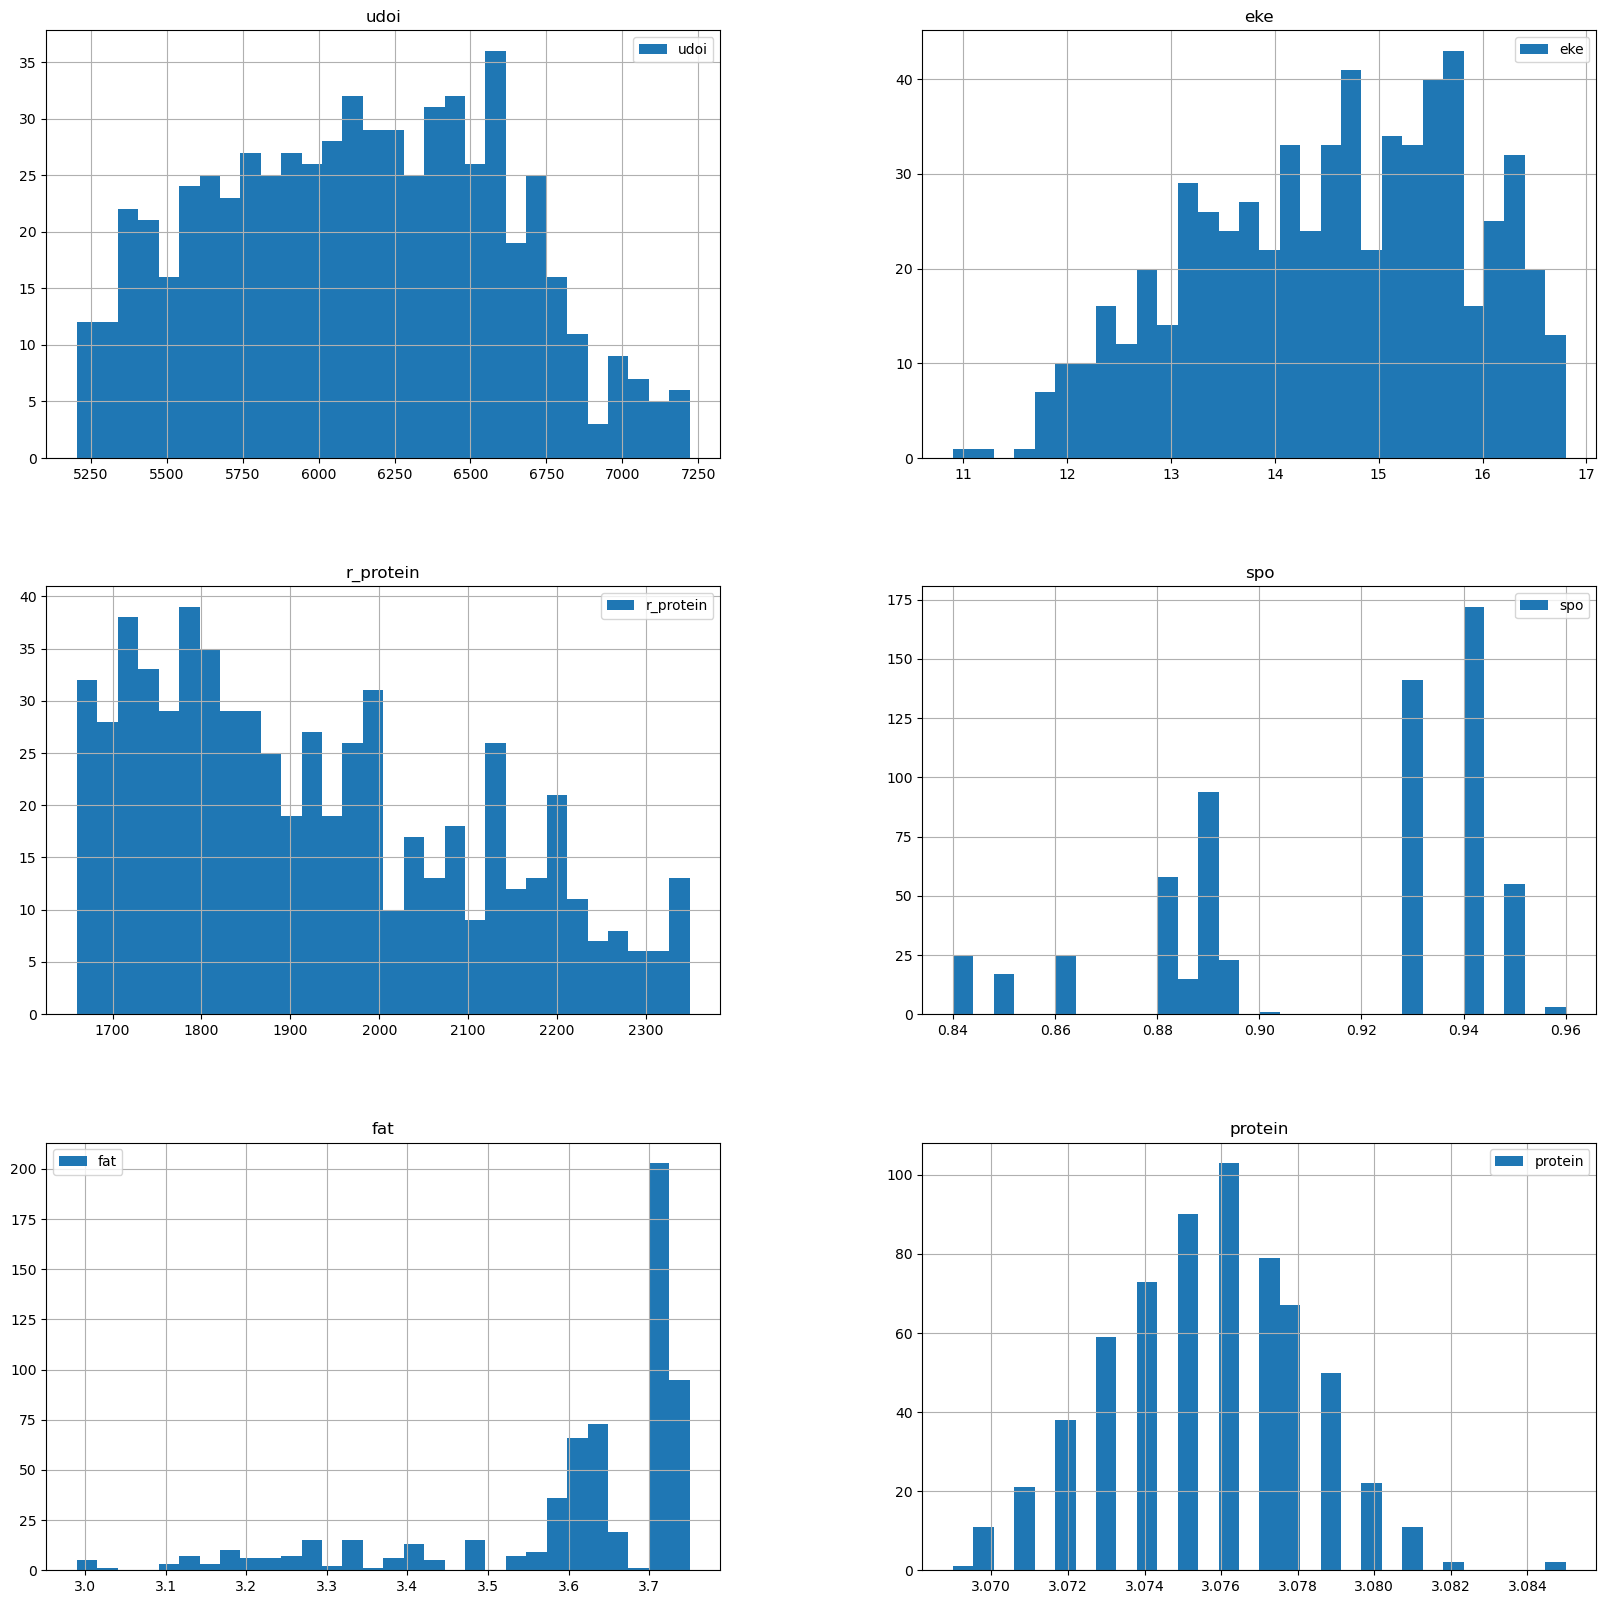

In [24]:
df_ferma_main.hist(bins=30, figsize=(20,20), legend = True)
plt.show()

Из всех гистограмм нормальным распределением обладает только информация по содержанию белка в молоке.

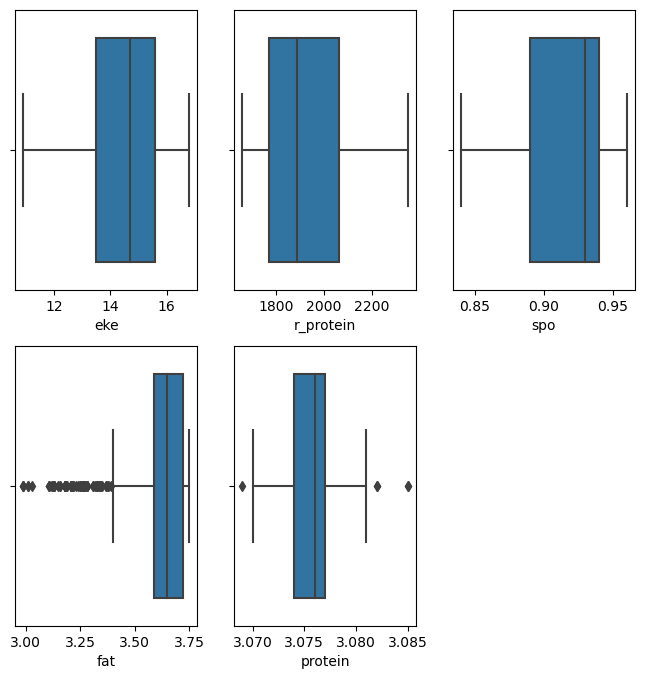

In [25]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 3, 1)
sns.boxplot(x = df_ferma_main['eke'])
plt.subplot(2, 3, 2)
sns.boxplot(x = df_ferma_main['r_protein'])
plt.subplot(2, 3, 3)
sns.boxplot(x = df_ferma_main['spo'])
plt.subplot(2, 3, 4)
sns.boxplot(x = df_ferma_main['fat'])
plt.subplot(2, 3, 5)
sns.boxplot(x = df_ferma_main['protein'])
plt.subplot(2, 3, 5)
plt.show()

Построив ящики по всем численным данным из датафрейма df_ferma_main, можем заметить:
1. Данные по жирности молока обладают выбросами, могу предположить, что они лишь информируют о том, что большая часть молока обладает одной жирностью, за исключением некоторых сортов, жирность которых ниже. Эти выбросы мы трогать не будем.
3. Данные по количеству белка в молоке тоже имеют выбросы. Их природа мне неизвестна. Так как выбросов в данном столбце мало, можно рассмотреть их и понять, в чем дело. 

In [26]:
df_ferma_main.query('protein < 3.070')
df_ferma_main.query('protein > 3.081')

udoi   eke  r_protein    spo           poroda  pastbishe father_poroda  \
77   5871  14.7       1795  0.895   Вис Бик Айдиал  Равнинное        Айдиал   
426  6701  15.7       2068  0.940  РефлешнСоверинг  Холмистое        Айдиал   
471  5883  14.9       2159  0.890   Вис Бик Айдиал  Равнинное       Соверин   
517  5819  13.7       1968  0.840   Вис Бик Айдиал  Холмистое        Айдиал   

      fat  protein    milk          age father_name  
77   3.61    3.082  вкусно  более_2_лет    Соловчик  
426  3.72    3.082  вкусно  более_2_лет      Буйный  
471  3.62    3.085  вкусно  более_2_лет    Соловчик  
517  3.15    3.085  вкусно  более_2_лет      Буйный

Никаких особенностей в данных не обнаружено. Данные выбросы удалять не будем.

Посмотрим на категориальные признаки

In [27]:
cat_col_names = ['poroda', 'pastbishe', 'father_poroda', 'father_name', 'milk', 'age']

In [28]:
def def_column_quality (df):
    x = df.select_dtypes(include=['object']).columns.tolist()
    return x

In [29]:
column_quality = def_column_quality(df_ferma_main)

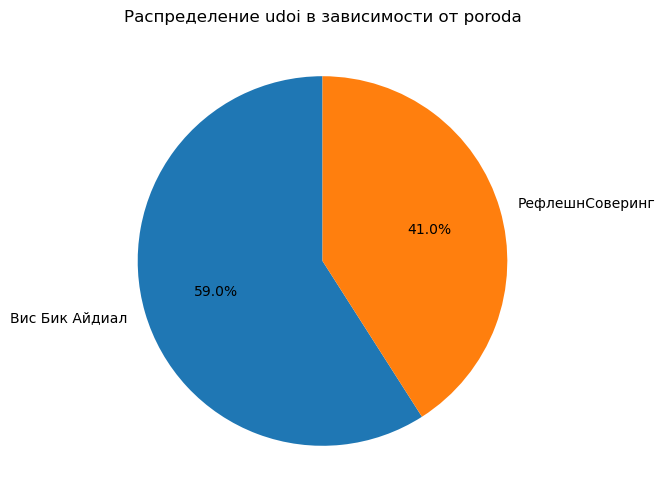

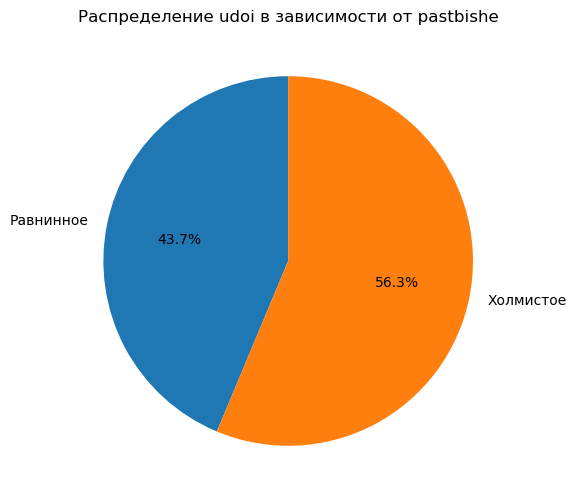

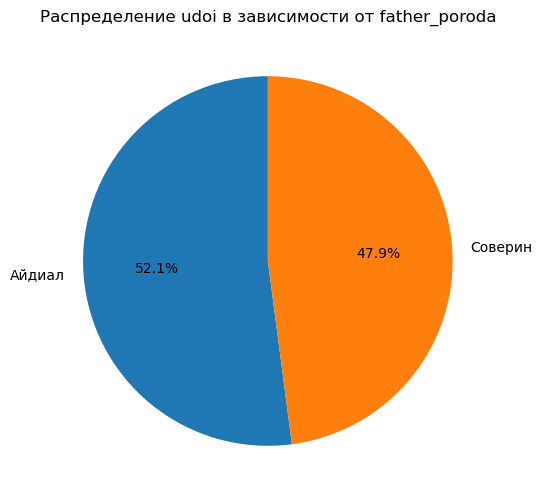

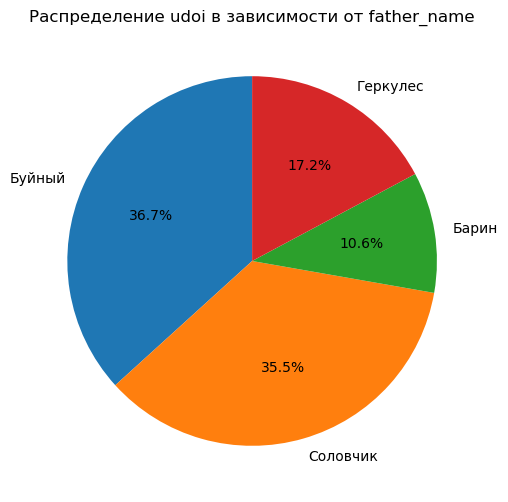

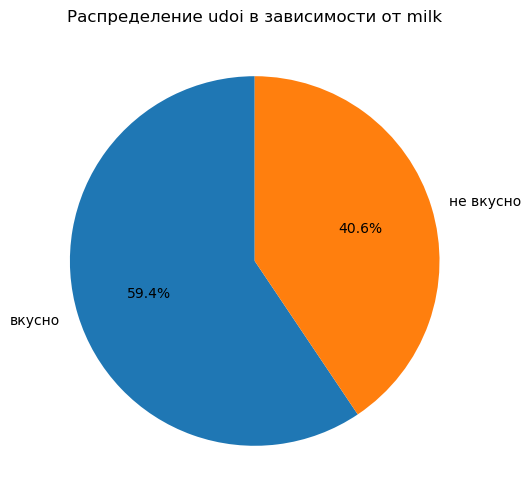

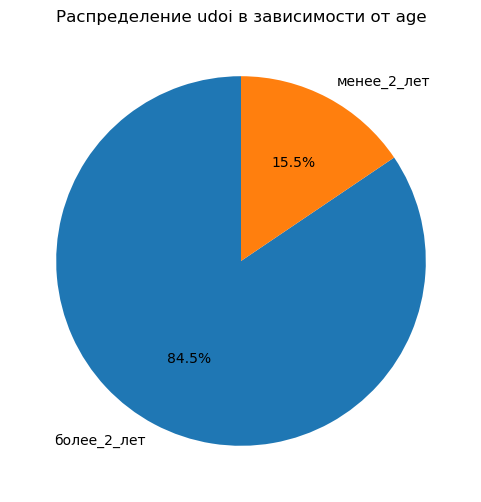

In [30]:
for col in cat_col_names:
    plt.figure(figsize=(6, 6))
    plt.pie(df_ferma_main.groupby(col)['udoi'].sum(), labels=df_ferma_main[col].unique(), autopct='%1.1f%%', startangle=90)
    plt.title(f'Распределение udoi в зависимости от {col}')
    plt.show()

Практически все категорильные признаки по удою молока (кроме распределения удоя в зависимости от имени папы коровы) распределены примерно равномерно, имея расождения +- 10%. Основной удой в зависимости от имени папы коровы распределен между двумя именами Буйный и Соловчик. Большая часть удоя - вкусное молоко с возростом коровы более 2 лет.

# Шаг 4. Корреляционный анализ признаков в датасете ferma_main.csv.

Так как ни один признак не распределен нормально, ко всем признакам был применен коэффициент корреляции Спирмена.

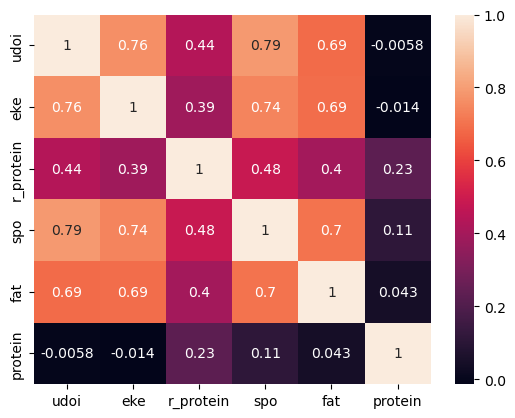

In [31]:
sns.heatmap(df_ferma_main[['udoi', 'eke', 'r_protein', 'spo', 'fat', 'protein']].corr(method='spearman'), annot = True);

Можно заметить, что udoi (Удой) неплохо коррелирует с spo (Сахаро-протеиновое соотношение) и eke (Энергетическая кормовая единица), что вполне справедливо, так как удой может зависить от состава корма. В лучшей степени с spo. Мультиколлинеарность (высокая корреляция между признаками) отсутствует.

Построим диаграммы рассеяния для признака Удой, кг и всех количественных признаков с учётом значения категориальных признаков.

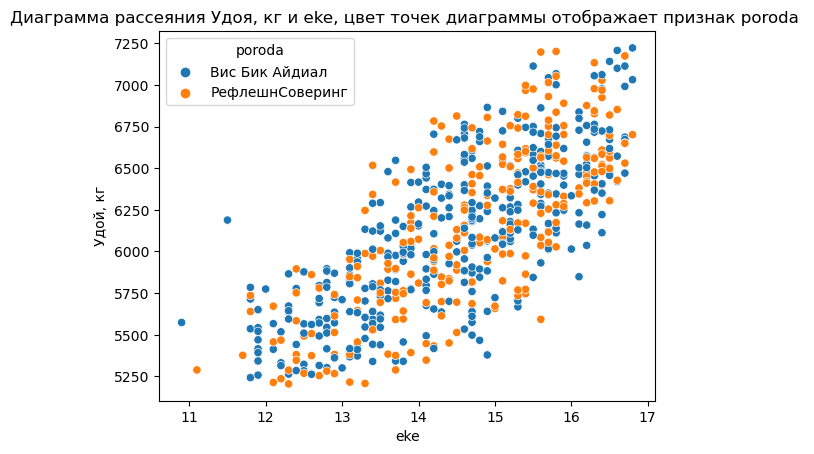

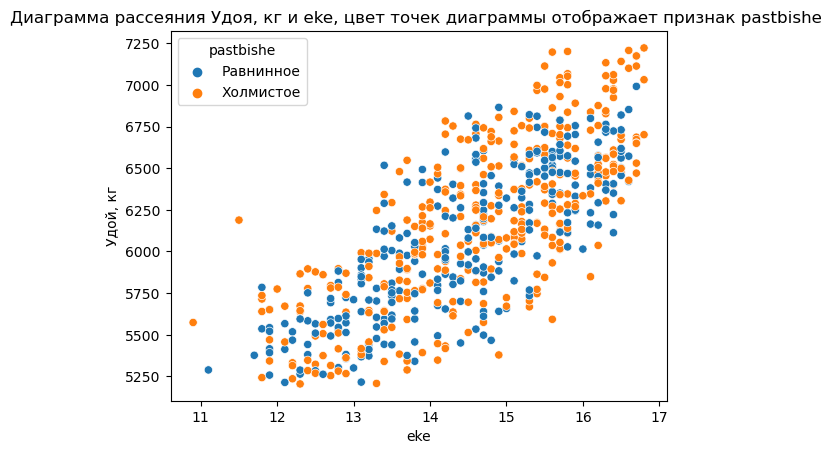

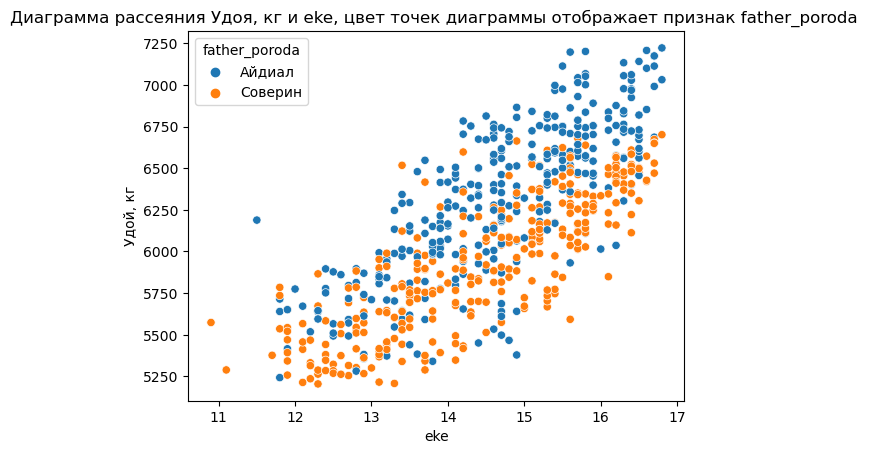

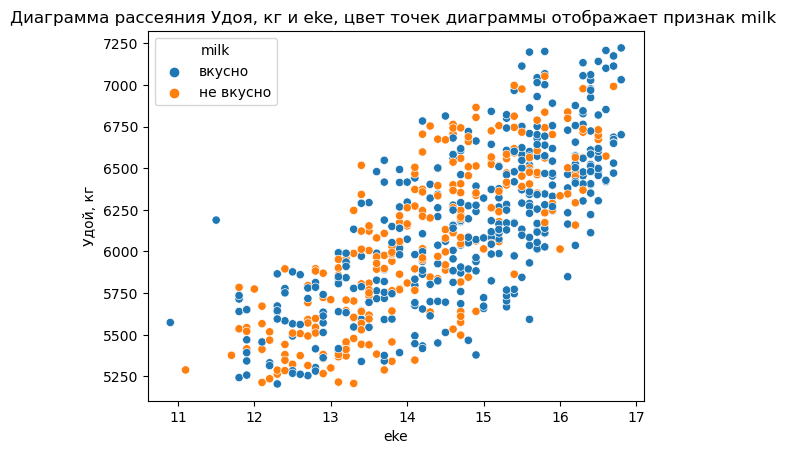

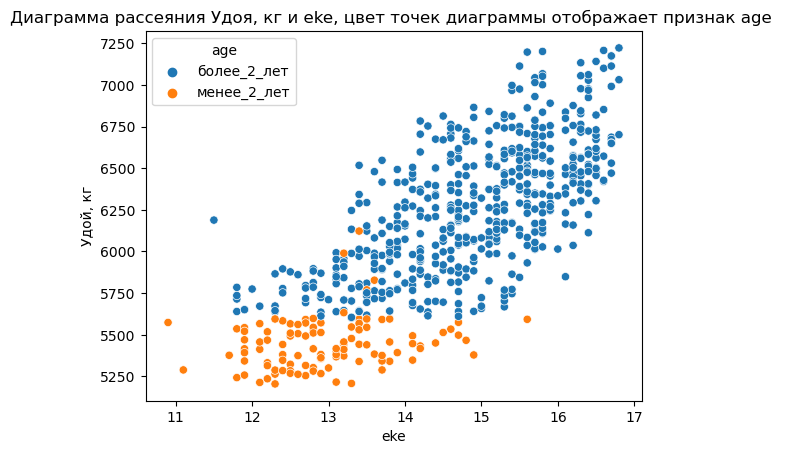

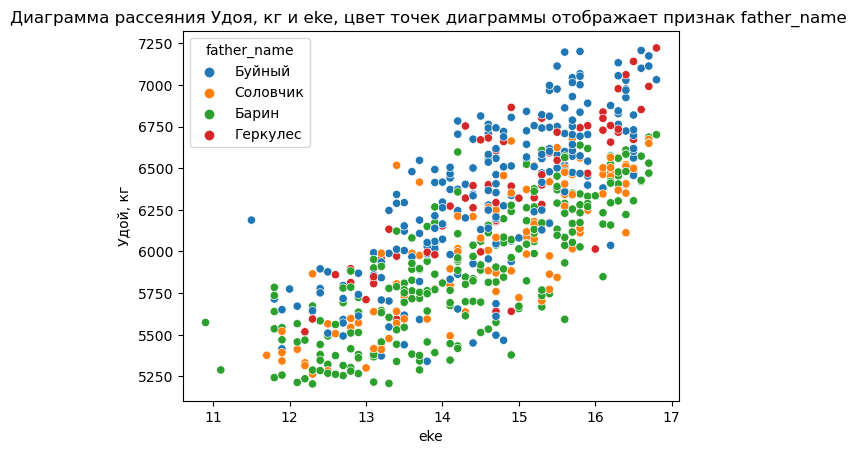

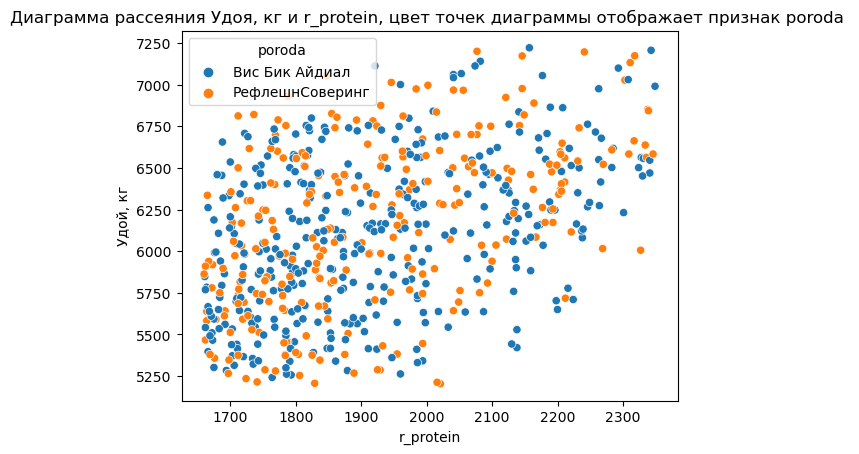

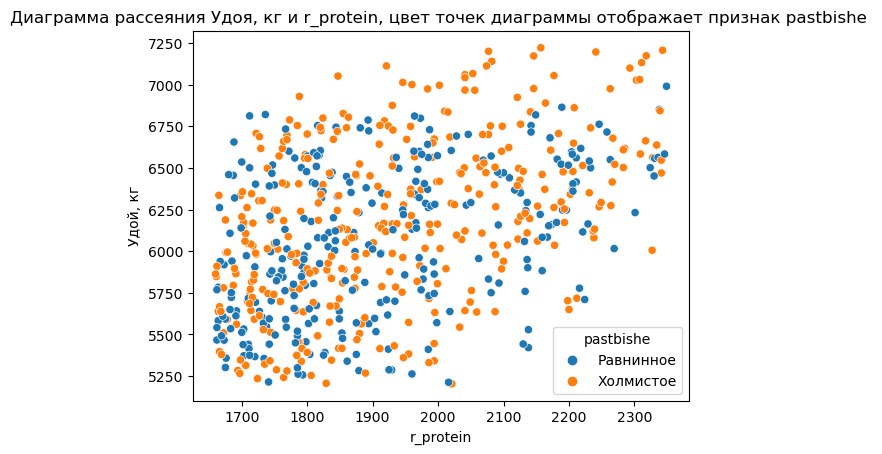

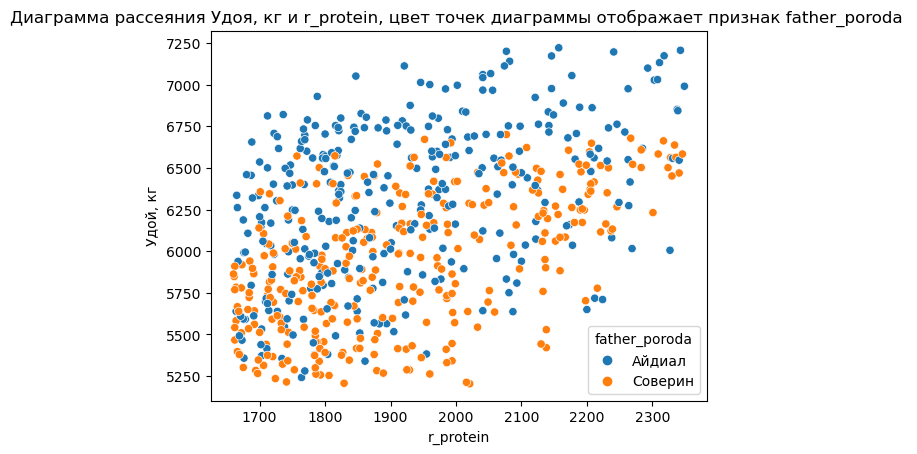

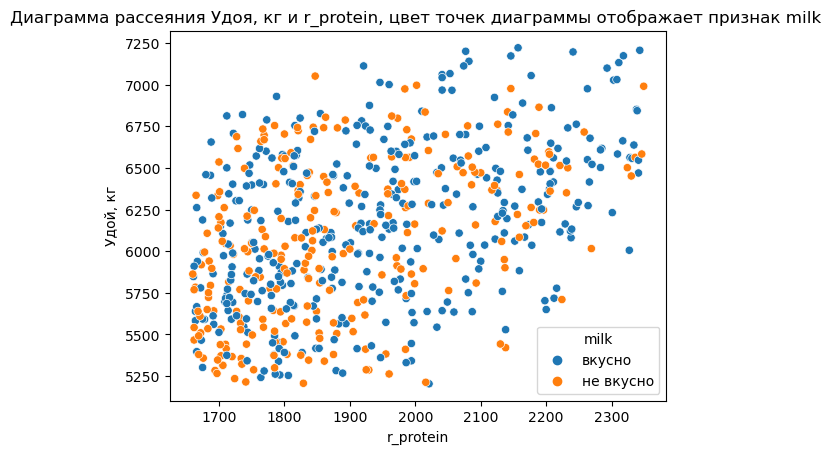

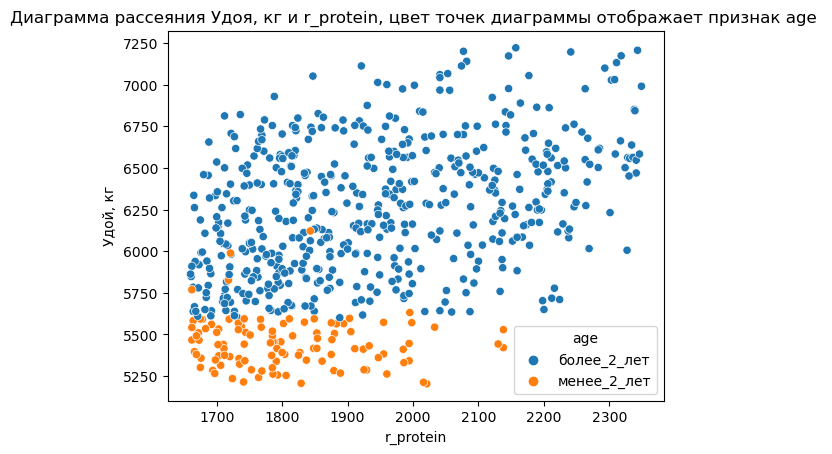

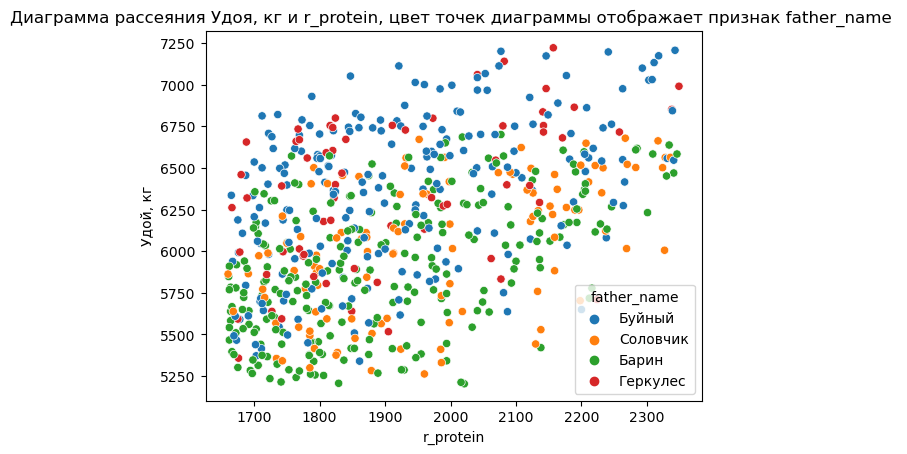

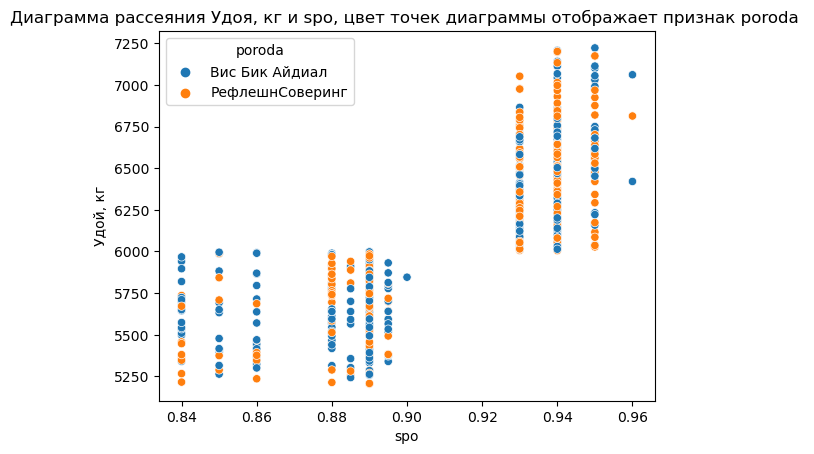

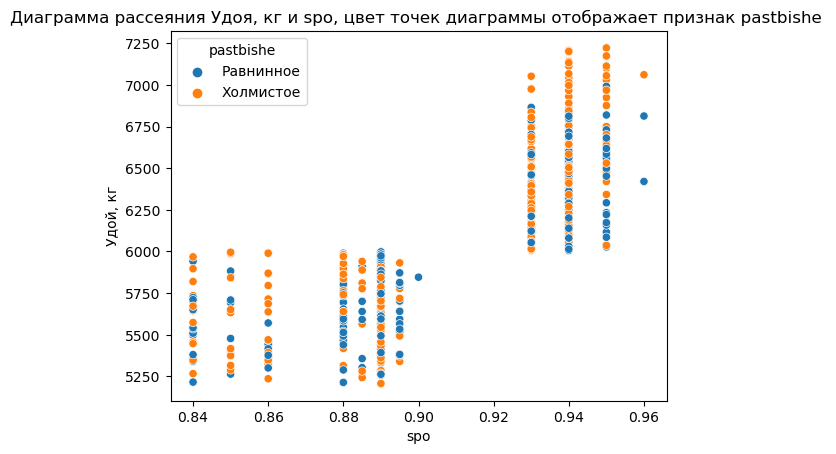

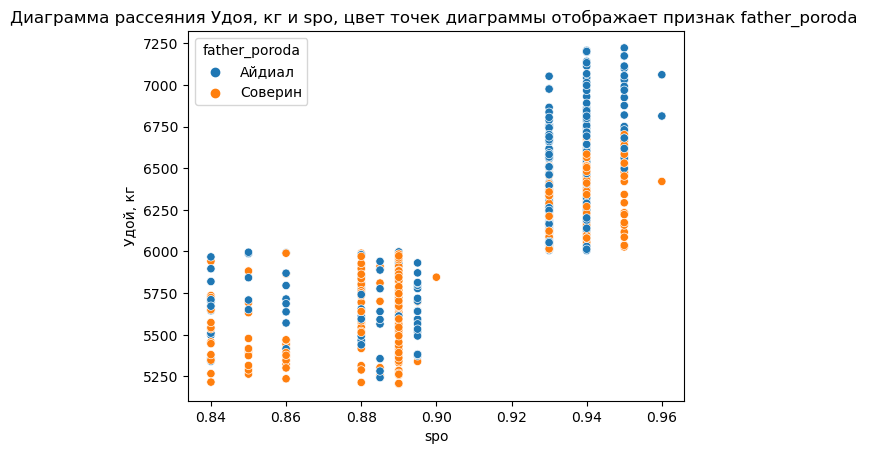

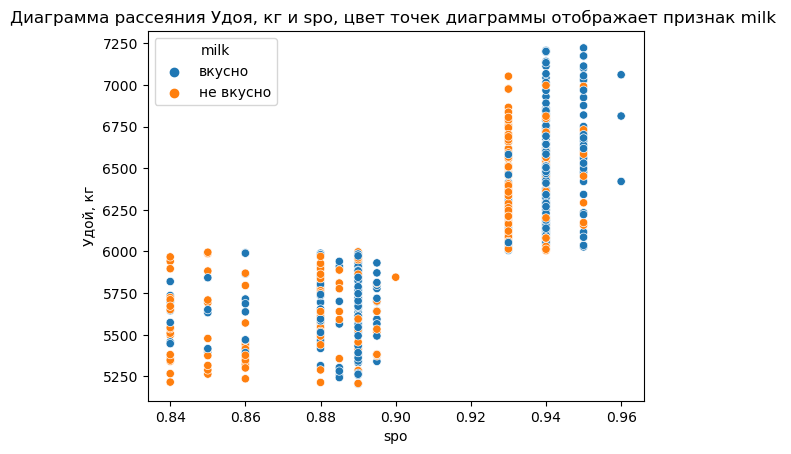

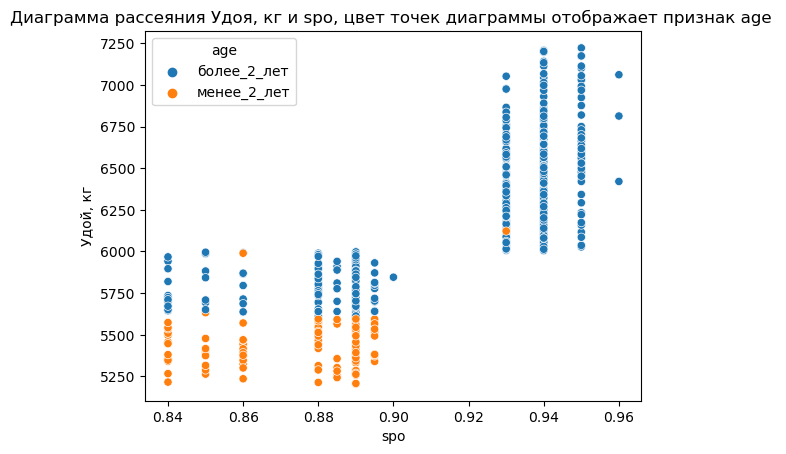

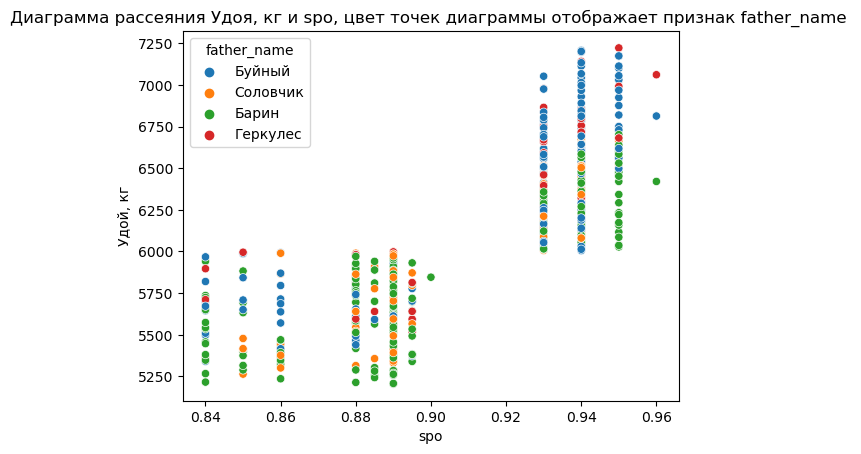

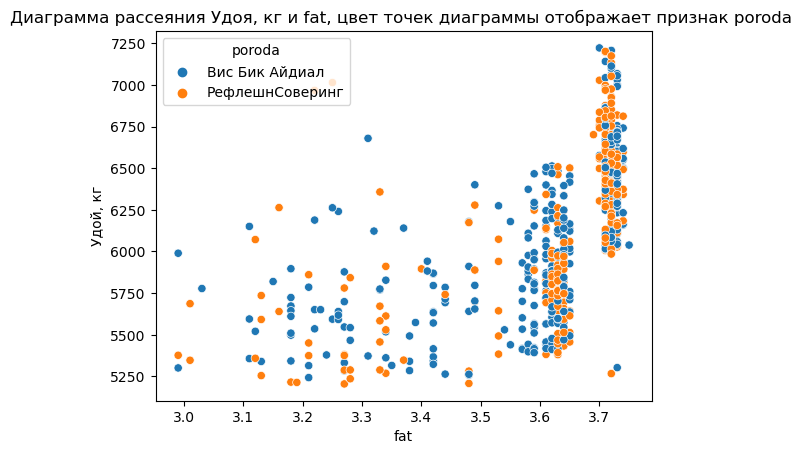

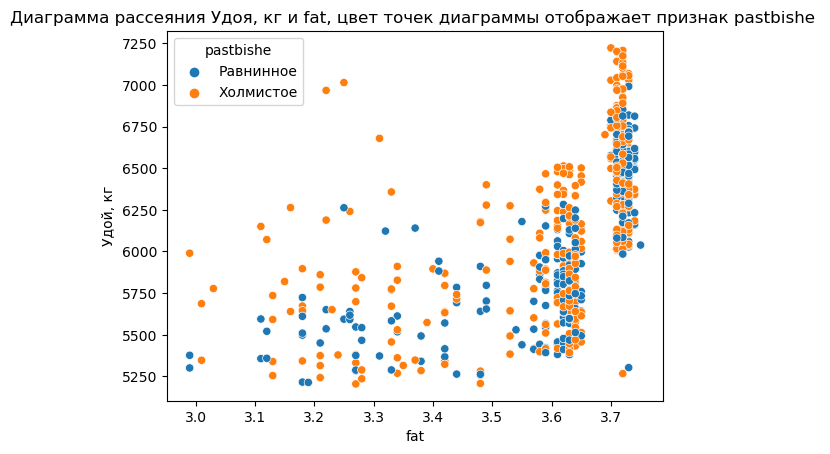

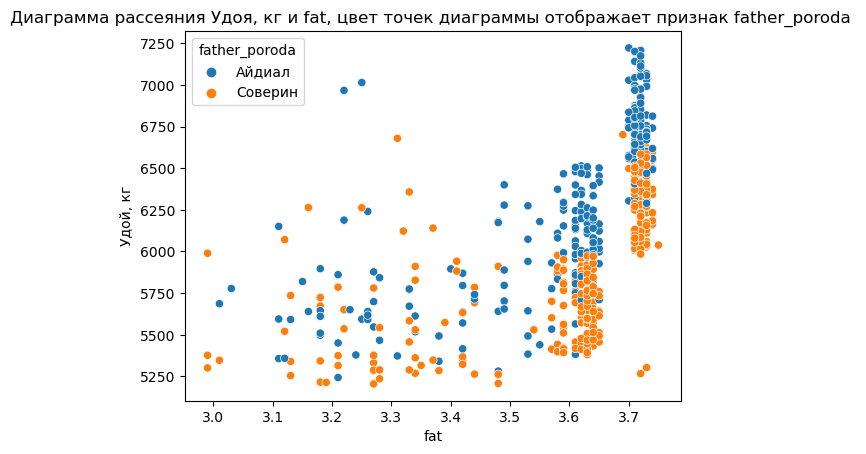

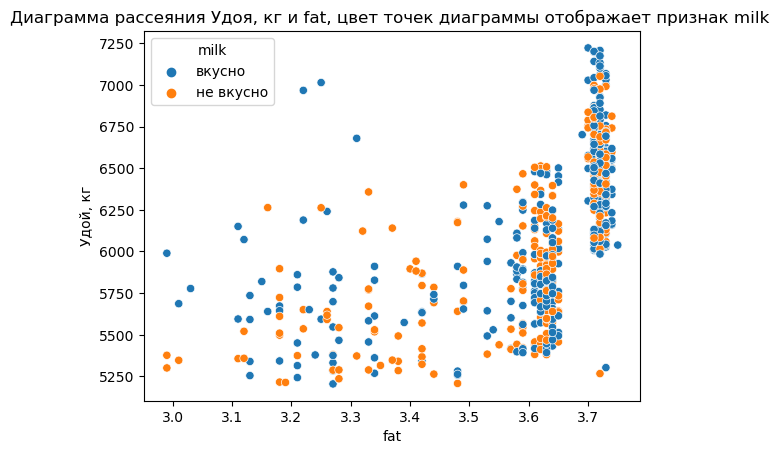

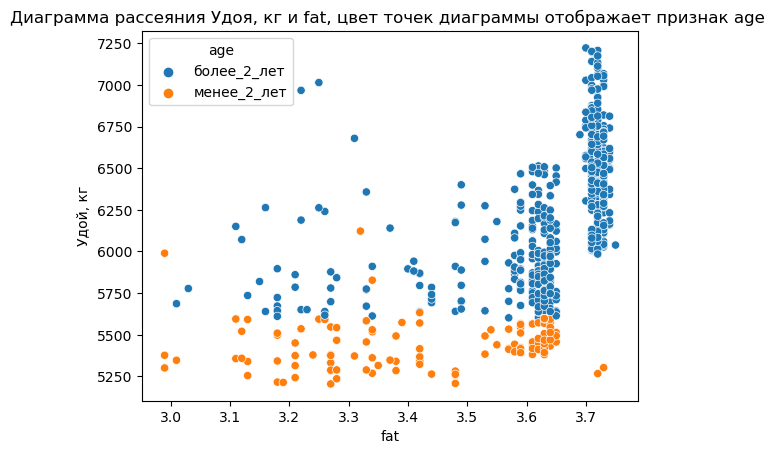

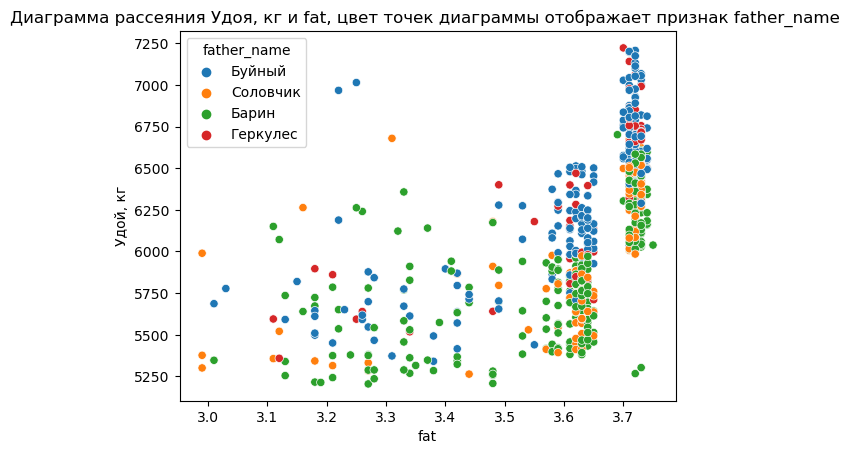

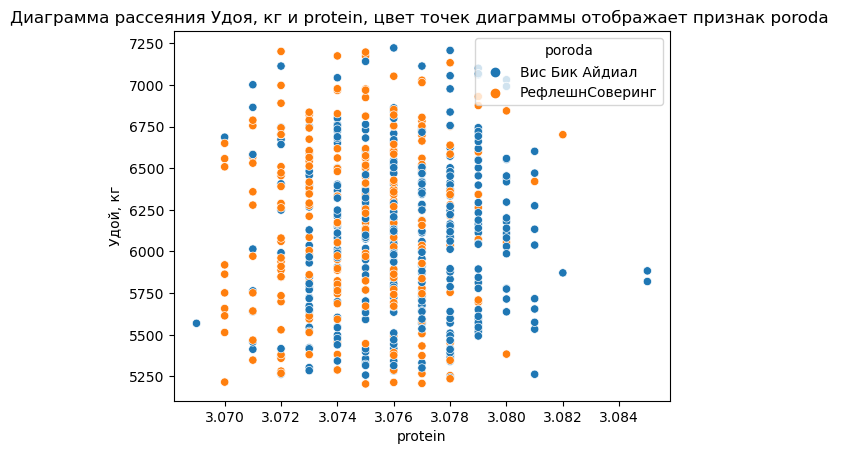

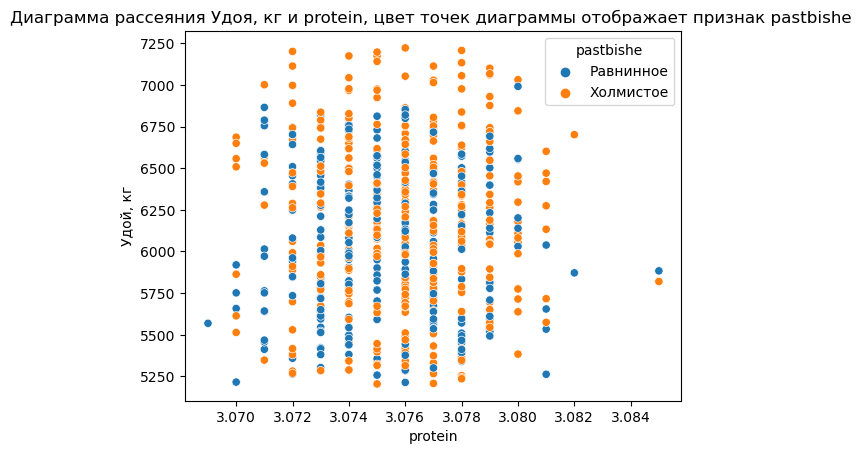

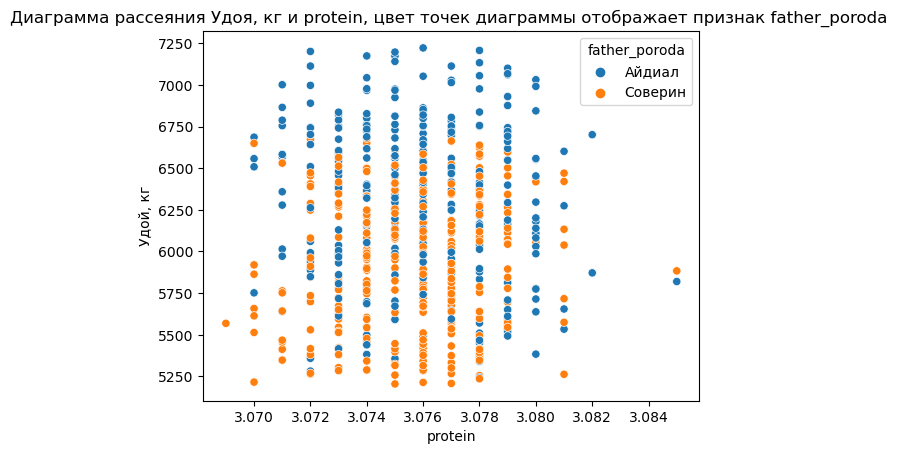

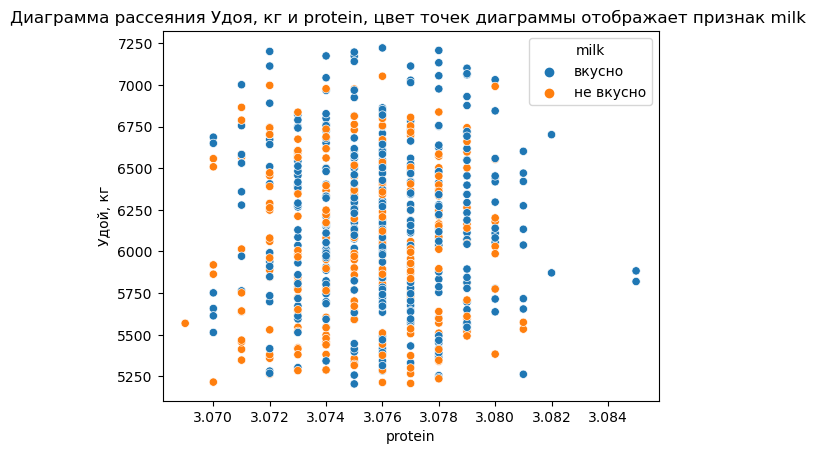

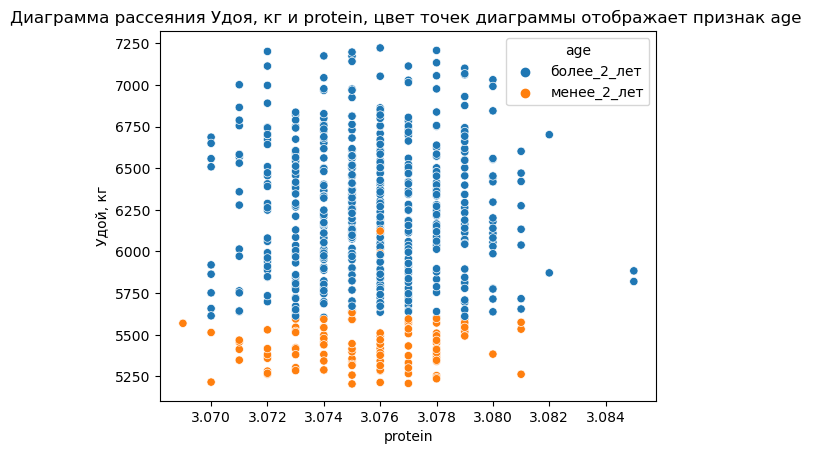

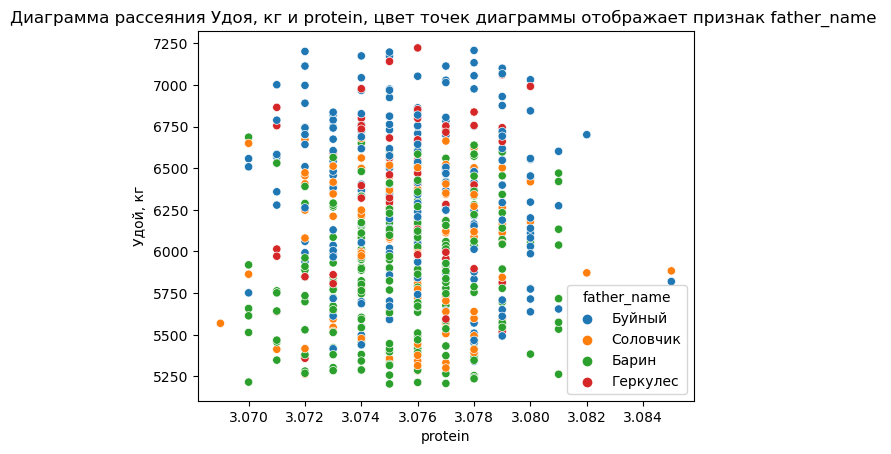

In [32]:
column_scatter = ['eke', 'r_protein', 'spo', 'fat', 'protein']
for i in column_scatter:
    for j in column_quality:
        sns.scatterplot(data = df_ferma_main, y = 'udoi', x = i, hue = j)
        plt.title(f"Диаграмма рассеяния Удоя, кг и {i}, цвет точек диаграммы отображает признак {j} ")
        plt.ylabel('Удой, кг')
        plt.xlabel(i)
        plt.show()

Присутствует линейная связь между удоем и eke (Энергетическая кормовая единица). Так же заметна связь, явно нелинейная, между удоем и spo (Сахаро-протеиновое соотношение). Заметна связь между удоем и fat (жирностью молока), но она (жирность) никак не может влиять на количество продуцируемого молока, это характеристика молока.

# Шаг 5. Задача регрессии.

Последующие операции будем проводить уже над копией датасета.

In [33]:
df_ferma_main_1 = df_ferma_main.copy()
df_ferma_main_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   udoi           629 non-null    int64  
 1   eke            629 non-null    float64
 2   r_protein      629 non-null    int64  
 3   spo            629 non-null    float64
 4   poroda         629 non-null    object 
 5   pastbishe      629 non-null    object 
 6   father_poroda  629 non-null    object 
 7   fat            629 non-null    float64
 8   protein        629 non-null    float64
 9   milk           629 non-null    object 
 10  age            629 non-null    object 
 11  father_name    629 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 59.1+ KB


Подготовим данные датасета ferma_main_1 и обучим на них первую модель LinearRegression.

In [34]:
cat_col_names_1 = ['poroda', 'pastbishe', 'father_poroda', 'age'] # категориальные признаки
num_col_names_1 = ['eke', 'r_protein', 'spo'] # количественные признаки

Так как в будущем нам нужно будет обучить три модели, введем в работу функцию

In [35]:
def Linear_function (df, def_quality, def_quantity):
    RANDOM_STATE = 42
    model_lr  = LinearRegression() 
    encoder = OneHotEncoder(drop='first', sparse=False) 
    scaler = StandardScaler()
    y = df['udoi']
    X = df.drop(columns=['udoi'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

    # Количественные признаки
    X_train_scaler = scaler.fit_transform(X_train[def_quantity])
    X_test_scaler = scaler.transform(X_test[def_quantity])

    # Качественные признаки
    X_train_ohe = encoder.fit_transform(X_train[def_quality])
    X_test_ohe = encoder.transform(X_test[def_quality])
    encoder_col_names = encoder.get_feature_names()
    df_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    df_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

    # Объединение
    X_train_scaled_ohe = pd.concat([pd.DataFrame(X_train_scaler), df_train_ohe], axis=1)
    X_test_scaled_ohe = pd.concat([pd.DataFrame(X_test_scaler), df_test_ohe], axis=1)

    model_lr.fit(X_train_scaled_ohe, y_train)
    y_pred = model_lr.predict(X_test_scaled_ohe)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"R2 LinearRegression = {r2:.3f}")
    print(f"MAE LinearRegression = {mae:.0f}")
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared = False)
    print(F"MSE: {mse:.3f}")
    print(F"RMSE: {rmse:.3f}")
    
    error = pd.DataFrame()
    error['y_test'] = y_test
    error['y_pred'] = y_pred
    error['error'] = y_test - y_pred
    sns.scatterplot(data = error, y = error['y_test'], x = error['error'])
    plt.xlabel('Значения тестовой выборки')
    plt.ylabel('Остатки')
    plt.show()
    
    plt.hist(error['error'], bins=20, alpha=0.7)
    plt.title(f'Гистограмма распределения остатков')
    plt.xlabel('Остатки')
    plt.ylabel('Частота')
    plt.show()
    
    interval = st.t.interval(confidence=0.95, df=len(y_pred)-1, loc=np.mean(y_pred), scale=st.sem(y_pred))
    print(interval)

R2 LinearRegression = 0.819
MAE LinearRegression = 181
MSE: 49633.635
RMSE: 222.786


C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


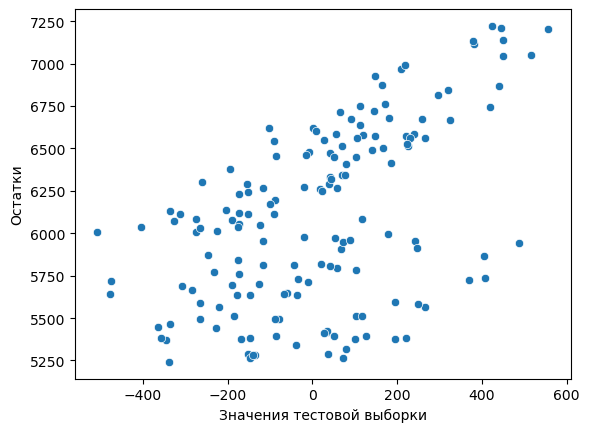

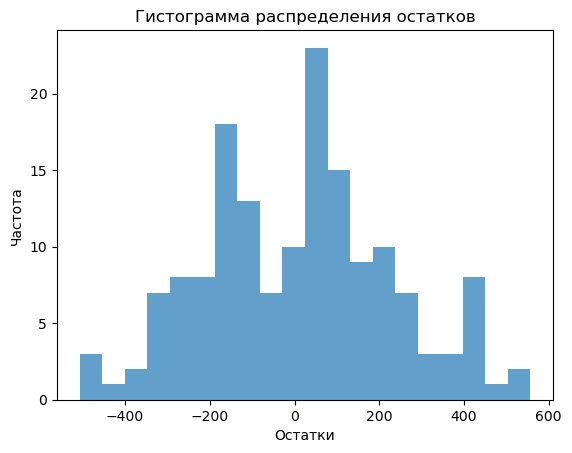

(6003.716901405246, 6145.393503368169)


In [36]:
Linear_function(df_ferma_main_1, cat_col_names_1, num_col_names_1)

Модель была обучена на всех признаках датафрейма. Метрика R2 говорит о том, что модель хорошо себя показывает в 82% случаев. Показатель Средней абсолютной ошибки равен 181 кг. Иными словами модель вылядит не плохо. Но после построения диаграммы рассеяния остатков, мы видим некоторую зависимость ошибки от значений тестовой выборки. Зависимость проявляется в промежутке значений 6750-7250. То есть модель чаще всего и сильнее всего ошибается именно на коровах с высоким показателем удоя.

Для создания второй модели выполним копию датафрейма

In [37]:
df_ferma_main_2 = df_ferma_main.copy()
df_ferma_main_2.head()

udoi   eke  r_protein    spo           poroda  pastbishe father_poroda  \
0  5863  14.2       1743  0.890   Вис Бик Айдиал  Равнинное        Айдиал   
1  5529  12.8       2138  0.890   Вис Бик Айдиал  Равнинное       Соверин   
2  5810  14.0       1854  0.885  РефлешнСоверинг  Холмистое       Соверин   
3  5895  12.4       2012  0.885  РефлешнСоверинг  Холмистое        Айдиал   
4  5302  12.8       1675  0.885   Вис Бик Айдиал  Равнинное       Соверин   

    fat  protein       milk          age father_name  
0  3.58    3.076     вкусно  более_2_лет      Буйный  
1  3.54    3.079     вкусно  менее_2_лет    Соловчик  
2  3.59    3.074  не вкусно  более_2_лет       Барин  
3  3.40    3.075  не вкусно  более_2_лет      Буйный  
4  3.73    3.073     вкусно  менее_2_лет       Барин

На диаграммах рассеяния можно увидеть, что некоторые входные признаки связаны с целевым нелинейно. Исключим нелинейность, чтобы эти признаки были информативны для линейной регрессии.
Чтобы устранить нелинейность между признаками spo и udoi, преобразуем spo в категориальный бинарный признак, использовав границу между двумя кластерами (0,92).
Нелинейность между eke и udoi можно исключить, если ввести новый признак eke в квадрате.

In [38]:
df_ferma_main_2['eke_sqr'] = df_ferma_main_2['eke']**2
df_ferma_main_2['spo'] = df_ferma_main_2['spo'].apply(lambda i: 1 if i > 0.92 else 0)
df_ferma_main_2.head()

udoi   eke  r_protein  spo           poroda  pastbishe father_poroda   fat  \
0  5863  14.2       1743    0   Вис Бик Айдиал  Равнинное        Айдиал  3.58   
1  5529  12.8       2138    0   Вис Бик Айдиал  Равнинное       Соверин  3.54   
2  5810  14.0       1854    0  РефлешнСоверинг  Холмистое       Соверин  3.59   
3  5895  12.4       2012    0  РефлешнСоверинг  Холмистое        Айдиал  3.40   
4  5302  12.8       1675    0   Вис Бик Айдиал  Равнинное       Соверин  3.73   

   protein       milk          age father_name  eke_sqr  
0    3.076     вкусно  более_2_лет      Буйный   201.64  
1    3.079     вкусно  менее_2_лет    Соловчик   163.84  
2    3.074  не вкусно  более_2_лет       Барин   196.00  
3    3.075  не вкусно  более_2_лет      Буйный   153.76  
4    3.073     вкусно  менее_2_лет       Барин   163.84

In [39]:
cat_col_names_2 = ['poroda', 'pastbishe', 'father_poroda', 'age'] # категориальные признаки
num_col_names_2 = ['eke_sqr', 'r_protein', 'spo'] # количественные признаки

R2 LinearRegression = 0.844
MAE LinearRegression = 164
MSE: 42848.300
RMSE: 206.998


C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


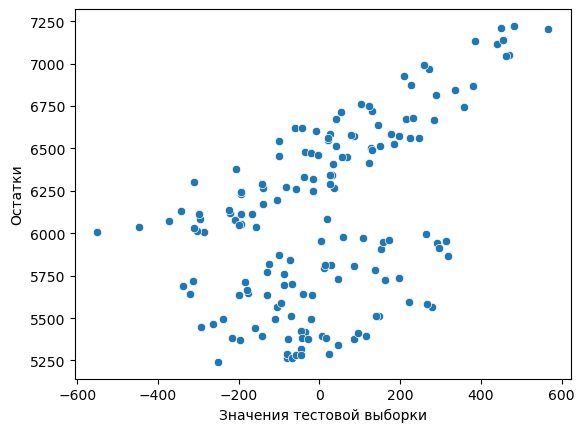

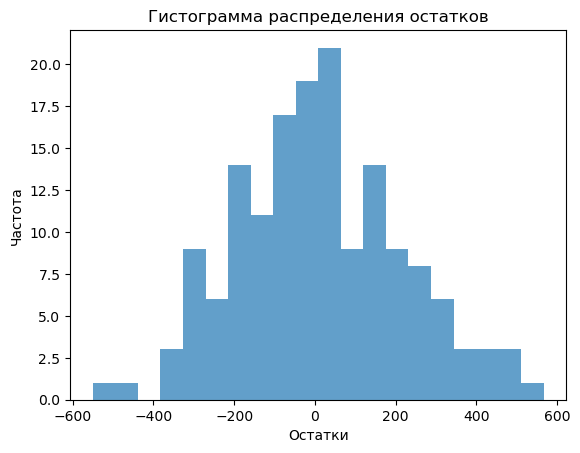

(6004.20308330497, 6148.015634702015)


In [40]:
Linear_function(df_ferma_main_2, cat_col_names_2, num_col_names_2)

После нововведений модель явна начала лучше работать. Метрика R2 увеличилась до 84%. Показатель Средней абсолютной ошибки уменьшился до 164 кг. 

Для создания третьей модели выполним копию датафрейма.

In [41]:
df_ferma_main_3 = df_ferma_main_2.copy()
df_ferma_main_3.info()
df_ferma_main_3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   udoi           629 non-null    int64  
 1   eke            629 non-null    float64
 2   r_protein      629 non-null    int64  
 3   spo            629 non-null    int64  
 4   poroda         629 non-null    object 
 5   pastbishe      629 non-null    object 
 6   father_poroda  629 non-null    object 
 7   fat            629 non-null    float64
 8   protein        629 non-null    float64
 9   milk           629 non-null    object 
 10  age            629 non-null    object 
 11  father_name    629 non-null    object 
 12  eke_sqr        629 non-null    float64
dtypes: float64(4), int64(3), object(6)
memory usage: 64.0+ KB


udoi   eke  r_protein  spo           poroda  pastbishe father_poroda   fat  \
0  5863  14.2       1743    0   Вис Бик Айдиал  Равнинное        Айдиал  3.58   
1  5529  12.8       2138    0   Вис Бик Айдиал  Равнинное       Соверин  3.54   
2  5810  14.0       1854    0  РефлешнСоверинг  Холмистое       Соверин  3.59   
3  5895  12.4       2012    0  РефлешнСоверинг  Холмистое        Айдиал  3.40   
4  5302  12.8       1675    0   Вис Бик Айдиал  Равнинное       Соверин  3.73   

   protein       milk          age father_name  eke_sqr  
0    3.076     вкусно  более_2_лет      Буйный   201.64  
1    3.079     вкусно  менее_2_лет    Соловчик   163.84  
2    3.074  не вкусно  более_2_лет       Барин   196.00  
3    3.075  не вкусно  более_2_лет      Буйный   153.76  
4    3.073     вкусно  менее_2_лет       Барин   163.84

In [42]:
cat_col_names_3 = ['poroda', 'pastbishe', 'father_poroda', 'age', 'father_name', 'spo'] # категориальные признаки
num_col_names_3 = ['eke_sqr', 'r_protein'] # количественные признаки

R2 LinearRegression = 0.863
MAE LinearRegression = 153
MSE: 37658.209
RMSE: 194.057


C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


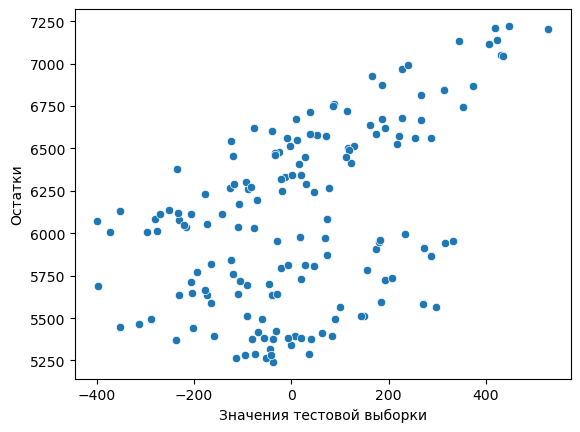

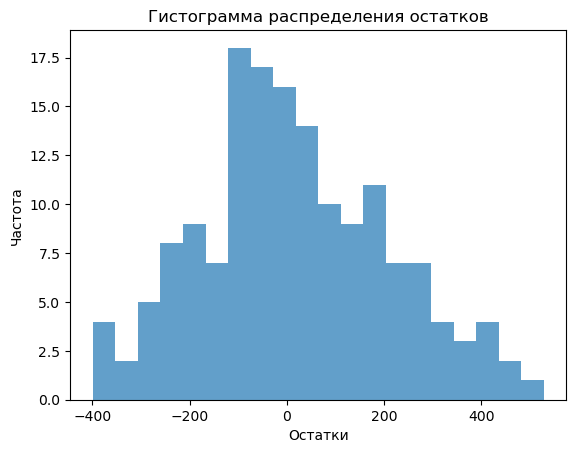

(5997.625729833485, 6142.382284592612)


In [43]:
Linear_function(df_ferma_main_3, cat_col_names_3, num_col_names_3)

**Промежуточные итоги:**    
В целом, данные, судя по результатам работы моделей, были хорошо подготовлены.    
Наилучшим результатом работы с данными может похвастаться последняя модель, которая собрала в себе все изменения из 1 и 2 моделей. Ее показатель R2 достиг максимального 86%, а предельная абсолютная ошибка - 153.    


Вторая модель была усовершенствована: данные столбца spo были переведены из количественных в качественные, а данные eke были возведены в квадрат для исключения нелинейности данных. Тем не менее, модель отработала лучше изначальной, где данные были взяты без изменений: R2 повысился с 82% до 84%, а ошибка снизилась с 181 до 164.    


3-я модель, главным и единственным изменением которой было добавление нового категориального признака - Имя Отца, показала, как уже было сказано ранее, наилучший результат. Таким образом, мы делаем вывод, что параметр Имя Отца для данного прогноза является весомым признаком.     
Тем не менее, диаграммы рассеяния моделей говорят об обратном. Диаграмма первой демонстрирует некоторую зависимость ошибки от значений тестовой выборки. Зависимость проявляется в промежутке значений 6500-7250. То есть модель чаще всего и сильнее всего ошибается именно на коровах с высоким показателем удоя. Диаграммы 2-ой и 3-ей модели, относительно первой, обладают меньшей дисперсией, но, все же, нельзя точно сказать, что модель работает некорректно.


В среднем, первая модель ошибается на 223 кг молока, 2-ая на 207 кг и 3-ья модель на 194 кг молока. Эти метрики лишь подтверждают, что наиболее стабильной моделью МО является 3-ая модель. 

С вероятностью 95% доверительный интервал (5997.625729833485, 6142.382284592612) содержит истинный средний удой коров. Так как целью построения модели является средний удой за год — не менее 6000 килограммов, следовательно, модель будет корректно отрабатывать по данному запросу.

С помощью лучшей модели спрогнозируем удой коров, которых фермер хочет купить.    
Так как клиент указал, что новобранцы в его коровнике будут получать на 5% более питательный корм, но информации по текущему рациону у клиента нет, заполним значения средним по текущему коровнику, увеличив их на 5%.

In [44]:
df_cow_buy_1 = df_cow_buy.copy()
df_cow_buy_1.head()

poroda  pastbishe father_poroda father_name  current_fat  \
0   Вис Бик Айдиал  Холмистое        Айдиал    Геркулес         3.58   
1   Вис Бик Айдиал  Равнинное       Соверин      Буйный         3.54   
2  РефлешнСоверинг  Равнинное       Соверин       Барин         3.59   
3  РефлешнСоверинг  Холмистое        Айдиал      Буйный         3.40   
4  РефлешнСоверинг  Равнинное        Айдиал      Буйный         3.64   

   current_protein          age  
0            3.076  более_2_лет  
1            3.081  менее_2_лет  
2            3.074  более_2_лет  
3            3.061  более_2_лет  
4            3.074  более_2_лет

In [45]:
column = ['eke', 'spo', 'r_protein']
for i in column:
    df_cow_buy_1[i] = df_ferma_main[i].mean() * 1.05
df_cow_buy_1['eke_sqr'] = df_cow_buy_1['eke'] ** 2
df_cow_buy_1

poroda  pastbishe father_poroda father_name  current_fat  \
0    Вис Бик Айдиал  Холмистое        Айдиал    Геркулес         3.58   
1    Вис Бик Айдиал  Равнинное       Соверин      Буйный         3.54   
2   РефлешнСоверинг  Равнинное       Соверин       Барин         3.59   
3   РефлешнСоверинг  Холмистое        Айдиал      Буйный         3.40   
4   РефлешнСоверинг  Равнинное        Айдиал      Буйный         3.64   
5   РефлешнСоверинг  Равнинное       Соверин    Геркулес         3.63   
7    Вис Бик Айдиал  Равнинное       Соверин      Буйный         3.57   
9   РефлешнСоверинг  Холмистое        Айдиал      Буйный         3.40   
10   Вис Бик Айдиал  Холмистое       Соверин    Соловчик         3.73   
11  РефлешнСоверинг  Равнинное       Соверин    Геркулес         3.73   
12   Вис Бик Айдиал  Холмистое        Айдиал    Геркулес         3.68   
13   Вис Бик Айдиал  Холмистое       Соверин       Барин         3.42   
15  РефлешнСоверинг  Холмистое        Айдиал      Буйный         3.40   
16   Вис Бик Айдиал  Холмистое       Соверин    Соловчик         3.73   
17  РефлешнСоверинг  Равнинное       Соверин    Геркулес         3.77   
18   Вис Бик Айдиал  Равнинное       Соверин      Буйный         3.34   

    current_protein          age        eke       spo    r_protein     eke_sqr  
0             3.076  более_2_лет  15.271073  0.958772  2019.532273  233.205675  
1             3.081  менее_2_лет  15.271073  0.958772  2019.532273  233.205675  
2             3.074  более_2_лет  15.271073  0.958772  2019.532273  233.205675  
3             3.061  более_2_лет  15.271073  0.958772  2019.532273  233.205675  
4             3.074  более_2_лет  15.271073  0.958772  2019.532273  233.205675  
5             3.053  менее_2_лет  15.271073  0.958772  2019.532273  233.205675  
7             3.079  более_2_лет  15.271073  0.958772  2019.532273  233.205675  
9             3.079  менее_2_лет  15.271073  0.958772  2019.532273  233.205675  
10            3.055  более_2_лет  15.271073  0.958772  2019.532273  233.205675  
11            3.073  более_2_лет  15.271073  0.958772  2019.532273  233.205675  
12            3.046  более_2_лет  15.271073  0.958772  2019.532273  233.205675  
13            3.075  менее_2_лет  15.271073  0.958772  2019.532273  233.205675  
15            3.065  более_2_лет  15.271073  0.958772  2019.532273  233.205675  
16            3.079  более_2_лет  15.271073  0.958772  2019.532273  233.205675  
17            3.053  менее_2_лет  15.271073  0.958772  2019.532273  233.205675  
18            3.069  более_2_лет  15.271073  0.958772  2019.532273  233.205675

In [46]:
cat_col_names_buy = ['poroda', 'pastbishe', 'father_poroda', 'age', 'father_name', 'spo'] # категориальные признаки
num_col_names_buy = ['eke_sqr', 'r_protein'] # количественные признаки

In [47]:
columns_df_ferma_main_3 = [column for column in df_ferma_main_3]
df_cow_buy_2 = pd.DataFrame()
list = ('r_protein', 'spo', 'poroda', 'pastbishe', 'father_poroda', 'age', 'eke_sqr', 'father_name')
for i in list:
    df_cow_buy_2[i] = df_cow_buy_1[i]

In [48]:
df_cow_buy_2['spo'] = df_cow_buy_2['spo'].apply(lambda i: 1 if i > 0.92 else 0)

In [49]:
RANDOM_STATE = 42
model_lr  = LinearRegression() 
encoder = OneHotEncoder(drop='first', sparse=False) 
scaler = StandardScaler()
y = df_ferma_main_3['udoi']
X = df_ferma_main_3.drop(columns=['udoi'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

##Тренировочные данные
# Количественные признаки
X_train_scaler = scaler.fit_transform(X_train[num_col_names_buy])
X_test_scaler = scaler.transform(X_test[num_col_names_buy])

# Качественные признаки
X_train_ohe = encoder.fit_transform(X_train[cat_col_names_buy])
X_test_ohe = encoder.transform(X_test[cat_col_names_buy])
encoder_col_names = encoder.get_feature_names()
df_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
df_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

# Объединение
X_train_scaled_ohe = pd.concat([pd.DataFrame(X_train_scaler), df_train_ohe], axis=1)
X_test_scaled_ohe = pd.concat([pd.DataFrame(X_test_scaler), df_test_ohe], axis=1)

model_lr.fit(X_train_scaled_ohe, y_train)
y_pred3 = model_lr.predict(X_test_scaled_ohe)

##Реальные данные
# Количественные признаки
cow_scaler = scaler.transform(df_cow_buy_2[num_col_names_buy])

# Качественные признаки
cow_ohe = encoder.transform(df_cow_buy_2[cat_col_names_buy])
encoder_col_names = encoder.get_feature_names()

df_cow_ohe = pd.DataFrame(cow_ohe, columns=encoder_col_names)

# Объединение
df_cow_scaler_ohe = pd.concat([pd.DataFrame(cow_scaler), df_cow_ohe], axis=1)

cow_pred = model_lr.predict(df_cow_scaler_ohe)
df_final = df_cow_buy_1
df_final['udoi'] = cow_pred
df_final.head()

C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out in

poroda  pastbishe father_poroda father_name  current_fat  \
0   Вис Бик Айдиал  Холмистое        Айдиал    Геркулес         3.58   
1   Вис Бик Айдиал  Равнинное       Соверин      Буйный         3.54   
2  РефлешнСоверинг  Равнинное       Соверин       Барин         3.59   
3  РефлешнСоверинг  Холмистое        Айдиал      Буйный         3.40   
4  РефлешнСоверинг  Равнинное        Айдиал      Буйный         3.64   

   current_protein          age        eke       spo    r_protein     eke_sqr  \
0            3.076  более_2_лет  15.271073  0.958772  2019.532273  233.205675   
1            3.081  менее_2_лет  15.271073  0.958772  2019.532273  233.205675   
2            3.074  более_2_лет  15.271073  0.958772  2019.532273  233.205675   
3            3.061  более_2_лет  15.271073  0.958772  2019.532273  233.205675   
4            3.074  более_2_лет  15.271073  0.958772  2019.532273  233.205675   

          udoi  
0  6550.337702  
1  6294.079624  
2  6288.140382  
3  6595.157783  
4  6542.301903

In [50]:
st.norm.interval(confidence=0.95, loc=np.mean(df_final['udoi']), scale=st.sem(df_final['udoi']))

(6356.154025980627, 6496.575444390005)

С вероятностью 95% прогнозные значение удоя находятся в интервале 6356 - 6496 кг в год.

# Шаг 6. Задача классификации.

Преобразование строковых значений в бинарные (0 или 1) целевого признака milk для дальнейшего анализа.

In [51]:
df_ferma_main_3['milk'] = df_ferma_main_3['milk'].replace({'не вкусно': 0, 'вкусно': 1})

In [52]:
def def_column_quantity_log(df):
    column_quantity = [column for column in df.describe()]
    return column_quantity

In [53]:
column_quantity = def_column_quantity_log(df_ferma_main_3)
column_quality = def_column_quality(df_ferma_main_3)
column_quantity.remove('eke')
column_quantity.remove('spo')
column_quantity.remove('fat')
column_quantity.remove('protein')
column_quantity.remove('milk')
column_quality.append('spo')
print(f'Категориальные признаки: {column_quality}\nКоличественные признаки: {column_quantity}')

Категориальные признаки: ['poroda', 'pastbishe', 'father_poroda', 'age', 'father_name', 'spo']
Количественные признаки: ['udoi', 'r_protein', 'eke_sqr']


In [54]:
df_main_log = pd.DataFrame()
df_main_log[column_quality] = df_ferma_main_3[column_quality]
df_main_log[column_quantity] = df_ferma_main_3[column_quantity]
df_main_log['milk'] = df_ferma_main_3['milk']
df_main_log

poroda  pastbishe father_poroda          age father_name  spo  \
0     Вис Бик Айдиал  Равнинное        Айдиал  более_2_лет      Буйный    0   
1     Вис Бик Айдиал  Равнинное       Соверин  менее_2_лет    Соловчик    0   
2    РефлешнСоверинг  Холмистое       Соверин  более_2_лет       Барин    0   
3    РефлешнСоверинг  Холмистое        Айдиал  более_2_лет      Буйный    0   
4     Вис Бик Айдиал  Равнинное       Соверин  менее_2_лет       Барин    0   
..               ...        ...           ...          ...         ...  ...   
624  РефлешнСоверинг  Равнинное        Айдиал  более_2_лет      Буйный    1   
625  РефлешнСоверинг  Равнинное       Соверин  менее_2_лет       Барин    0   
626  РефлешнСоверинг  Холмистое       Соверин  более_2_лет       Барин    0   
627  РефлешнСоверинг  Равнинное       Соверин  более_2_лет       Барин    0   
628   Вис Бик Айдиал  Холмистое       Соверин  более_2_лет    Соловчик    1   

     udoi  r_protein  eke_sqr  milk  
0    5863       1743   201.64     1  
1    5529       2138   163.84     1  
2    5810       1854   196.00     0  
3    5895       2012   153.76     0  
4    5302       1675   163.84     1  
..    ...        ...      ...   ...  
624  6812       1964   237.16     0  
625  5513       1700   166.41     1  
626  5970       1837   207.36     0  
627  5746       1994   190.44     1  
628  6503       2283   262.44     1  

[629 rows x 10 columns]

In [55]:
RANDOM_STATE = 42

X = df_main_log.drop(columns=['milk'])
y = df_main_log['milk']

# разбиваем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

scaler = StandardScaler()
encoder = OneHotEncoder(drop='first', sparse=False)

# Количественные признаки
X_train_scaler = scaler.fit_transform(X_train[column_quantity])
X_test_scaler = scaler.transform(X_test[column_quantity])

# Качественные признаки
X_train_ohe = encoder.fit_transform(X_train[column_quality])
X_test_ohe = encoder.transform(X_test[column_quality])

encoder_col_names = encoder.get_feature_names()

df_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
df_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

# Объединение
X_train_scaled_ohe = pd.concat([pd.DataFrame(X_train_scaler), df_train_ohe], axis=1)
X_test_scaled_ohe = pd.concat([pd.DataFrame(X_test_scaler), df_test_ohe], axis=1)

# создаём объект для работы с моделью
clf = LogisticRegression()

# обучаем модель на данных
clf = clf.fit(X_train_scaled_ohe, y_train)

# получаем прогнозные метки классов
y_pred = clf.predict(X_test_scaled_ohe)

# проводим оценку точности
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('recall: ',round(recall ,2))
print('precision: ',round(precision,2))
print('accuracy: ',round(acc,2))

recall:  0.75
precision:  0.69
accuracy:  0.64


C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Модель совершает ошибки FP чаще, чем FN, то есть эффективнее избегает ошибок второго типа. Исходя из метрики accuracy, можем сказать, что модель далеко не идеальна и в 36% предсказаний допускает ошибки.

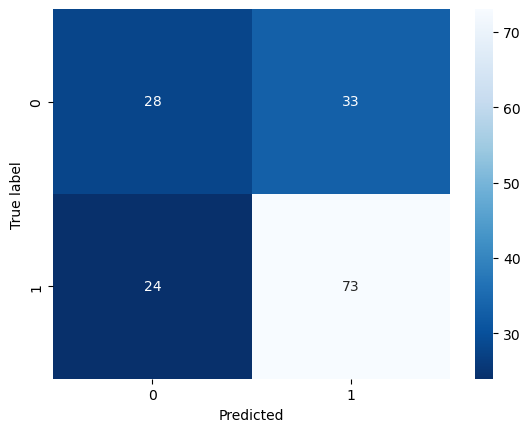

In [56]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

Исходя из матрицы ошибок, можем сделать вывод, что модель чаще дает значение "вкусно" невкусному молоку, чем "невкусным" называет вкусное. Так как наша задача состоит в том, чтобы определять вкусное молоко, то и стремиться нужно к минимизации ошибки первого рода. Далее нам предстоит поработать с порогами разделения на классы.

In [57]:
y_proba = clf.predict_proba(X_test_scaled_ohe)[:, 1]
data = pd.DataFrame(zip(y_test, y_proba),
columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False) 

def cost(y_valid,y_pred_):
    if y_valid < y_pred_:
        return 1
    else:
        return 0

    
thresholds = [round(i,3) for i in np.linspace(0.7,0.9,num = 12,endpoint=False)]

values = []
columns = []
for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'] = data['y_proba'].apply(lambda x: 1 if x>= i else 0)
    data['check'] = data.apply(lambda x : cost(x.y_valid,x.y_pred_), 1)
    values.append(data['check'].sum())

costs = pd.DataFrame(zip(columns, values),columns = ['Threshold', 'FP']) 
costs

C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Threshold  FP
0     y_pred_0.7   6
1   y_pred_0.717   5
2   y_pred_0.733   5
3    y_pred_0.75   5
4   y_pred_0.767   3
5   y_pred_0.783   1
6     y_pred_0.8   1
7   y_pred_0.817   0
8   y_pred_0.833   0
9    y_pred_0.85   0
10  y_pred_0.867   0
11  y_pred_0.883   0

recall:  0.07
precision:  1.0
accuracy:  0.43


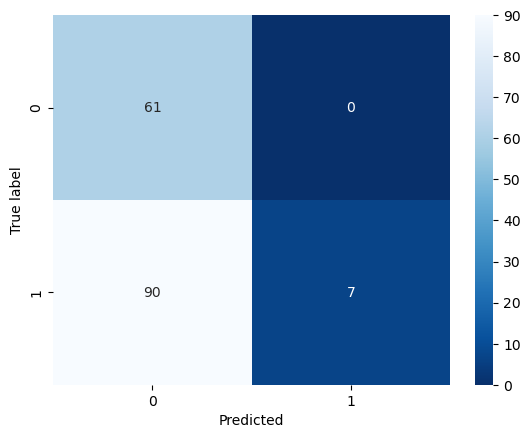

In [58]:
threshold = 0.81
y_pred_custom_threshold = (y_proba > threshold).astype(int)
y_pred_custom_threshold
cm = confusion_matrix(y_test, y_pred_custom_threshold)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted');

acc = accuracy_score(y_test, y_pred_custom_threshold)
precision = precision_score(y_test, y_pred_custom_threshold)
recall = recall_score(y_test, y_pred_custom_threshold)
print('recall: ',round(recall ,2))
print('precision: ',round(precision,2))
print('accuracy: ',round(acc,2))

Пороговое значение, при котором модель минизирует ошибку первого рода - 0.817. Но, при значении порога 0.8 количество верных предсказаний равно 1. Проанализировав ближайшие пороги к нашему минимуму, я обратил внимание на коэффициент 0.783, при котором модель верно предскажет 11 значений, но присутствует одно FP предсказание. Я бы посоветовал воспользоваться такой конфигурацией модели, где ошибка допускается, но профит от допущенной ошибки больше, чем от ее отсутствия. Но. так как заказчик не хочет рисковать вкусом, применим порог 0.81 в прогнозе на реальных данных. Модель ошибается в 40% случаев.

In [59]:
column_quality_final = column_quality
column_quantity_final = column_quantity
print(f'Категориальные признаки: {column_quality_final}\nКоличественные признаки: {column_quantity_final}')

Категориальные признаки: ['poroda', 'pastbishe', 'father_poroda', 'age', 'father_name', 'spo']
Количественные признаки: ['udoi', 'r_protein', 'eke_sqr']


In [60]:
df_main_final = pd.DataFrame()
df_main_final[column_quality] = df_final[column_quality]
df_main_final[column_quantity] = df_final[column_quantity]

In [61]:
df_main_final['spo'] = df_final['spo'].apply(lambda i: 1 if i > 0.91 else 0)

In [62]:
##Реальные данные
# Количественные признаки
final_scaler = scaler.transform(df_main_final[column_quantity_final])

# Качественные признаки
final_ohe = encoder.transform(df_main_final[column_quality_final])
encoder_col_names = encoder.get_feature_names()

df_final_ohe = pd.DataFrame(final_ohe, columns=encoder_col_names)

# Объединение
df_final_scaler_ohe = pd.concat([pd.DataFrame(final_scaler), df_final_ohe], axis=1)

# обучаем модель на данных
final_pred = clf.predict(df_final_scaler_ohe)
y_proba = clf.predict_proba(df_final_scaler_ohe)[:, 1]

df_final['milk'] = pd.DataFrame(y_proba)
df_final['milk'] = df_final['milk'].apply(lambda x: 'вкусно' if x > 0.81 else 'не вкусно')
df_final

C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


poroda  pastbishe father_poroda father_name  current_fat  \
0    Вис Бик Айдиал  Холмистое        Айдиал    Геркулес         3.58   
1    Вис Бик Айдиал  Равнинное       Соверин      Буйный         3.54   
2   РефлешнСоверинг  Равнинное       Соверин       Барин         3.59   
3   РефлешнСоверинг  Холмистое        Айдиал      Буйный         3.40   
4   РефлешнСоверинг  Равнинное        Айдиал      Буйный         3.64   
5   РефлешнСоверинг  Равнинное       Соверин    Геркулес         3.63   
7    Вис Бик Айдиал  Равнинное       Соверин      Буйный         3.57   
9   РефлешнСоверинг  Холмистое        Айдиал      Буйный         3.40   
10   Вис Бик Айдиал  Холмистое       Соверин    Соловчик         3.73   
11  РефлешнСоверинг  Равнинное       Соверин    Геркулес         3.73   
12   Вис Бик Айдиал  Холмистое        Айдиал    Геркулес         3.68   
13   Вис Бик Айдиал  Холмистое       Соверин       Барин         3.42   
15  РефлешнСоверинг  Холмистое        Айдиал      Буйный         3.40   
16   Вис Бик Айдиал  Холмистое       Соверин    Соловчик         3.73   
17  РефлешнСоверинг  Равнинное       Соверин    Геркулес         3.77   
18   Вис Бик Айдиал  Равнинное       Соверин      Буйный         3.34   

    current_protein          age        eke       spo    r_protein  \
0             3.076  более_2_лет  15.271073  0.958772  2019.532273   
1             3.081  менее_2_лет  15.271073  0.958772  2019.532273   
2             3.074  более_2_лет  15.271073  0.958772  2019.532273   
3             3.061  более_2_лет  15.271073  0.958772  2019.532273   
4             3.074  более_2_лет  15.271073  0.958772  2019.532273   
5             3.053  менее_2_лет  15.271073  0.958772  2019.532273   
7             3.079  более_2_лет  15.271073  0.958772  2019.532273   
9             3.079  менее_2_лет  15.271073  0.958772  2019.532273   
10            3.055  более_2_лет  15.271073  0.958772  2019.532273   
11            3.073  более_2_лет  15.271073  0.958772  2019.532273   
12            3.046  более_2_лет  15.271073  0.958772  2019.532273   
13            3.075  менее_2_лет  15.271073  0.958772  2019.532273   
15            3.065  более_2_лет  15.271073  0.958772  2019.532273   
16            3.079  более_2_лет  15.271073  0.958772  2019.532273   
17            3.053  менее_2_лет  15.271073  0.958772  2019.532273   
18            3.069  более_2_лет  15.271073  0.958772  2019.532273   

       eke_sqr         udoi       milk  
0   233.205675  6550.337702  не вкусно  
1   233.205675  6294.079624  не вкусно  
2   233.205675  6288.140382  не вкусно  
3   233.205675  6595.157783  не вкусно  
4   233.205675  6542.301903  не вкусно  
5   233.205675  6340.184655  не вкусно  
7   233.205675  6502.682315  не вкусно  
9   233.205675  6386.555092  не вкусно  
10  233.205675  6349.157746  не вкусно  
11  233.205675  6548.787346  не вкусно  
12  233.205675  6550.337702  не вкусно  
13  233.205675  6086.931016  не вкусно  
15  233.205675  6595.157783  не вкусно  
16  233.205675  6349.157746  не вкусно  
17  233.205675  6340.184655  не вкусно  
18  233.205675  6502.682315  не вкусно

Отберем коров, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко.

In [63]:
df_final = df_final.query('udoi >= 6000 & milk == "вкусно"')
df_final

Empty DataFrame
Columns: [poroda, pastbishe, father_poroda, father_name, current_fat, current_protein, age, eke, spo, r_protein, eke_sqr, udoi, milk]
Index: []

In [64]:
df_final['poroda'].count()

0

С увелечением порога предендентов на покупку совсем не осталось.

В данной задаче были применены 2 модели МО: линейная и логистические регрессии. 

В модели линейной регрессии были поэтапно введены некоторые изменения: была найдена нелинейность признаков spo и udoi. После анализа диаграммы рассеяния данных признаков было замечено, что значения spo визуально разделены при пороговом значении. В связи с чем было принято решение перевести признак spo в категориальный класс; нелинейность была замечена так же между признаки udoi и eke. Для решения данной проблемы был введен новый признак eke_sqr, который является eke, возведенный в квадрат; был введен новый признак: father_name, который улучшил работу модели. 

Для модели логистической регрессии было принято решение об изменении порога принадлежности к классам, исходя из бизнес-запроса.



Улучшение результатов работы модели, по моему мнению, могли быть достигнуты за счет добавления новых признаков. Для удоя это может быть, допустим, масса коровы. 

Кроме того, модель могла бы работать лучше, если бы начальные данные имели бОльшую зависимость между собой. При построении диаграммы рассеяния мы видели, что большинство признаков вообще никак не коррелирует с целевым признаком, следовательно, погрешность модели с такими данными только увеличивается.

В плане метрик, данный проект основывался на метриках MAE, MSE, MRSE для модели классификации и Accuracy, Precision, Recall для модели логистической регрессии.

Точность (Accuracy): Показывает общую долю правильных предсказаний. 

Точность положительного класса (Precision): Показывает долю верно предсказанных положительных случаев относительно всех предсказанных положительных случаев. Это важно, если ложноположительные срабатывания дорого стоят. В нашем кейсе как раз ложноположительные (FP) являются критическими ошибками, следовательно, данная метрика должна стремиться к нулю при работе модели.

Полнота (Recall): Показывает долю верно предсказанных положительных случаев относительно всех реальных положительных случаев. Это важно, если упущенные положительные случаи имеют высокую стоимость.